# Boston
_Ch 02 - Q10 (applied)_  

__Description__  
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

__Source__  
The data was originally published by Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

__References__  
This dataset is a part of the course material of the book : ___Introduction to Statistical Learning with R___

__Short description of variables__  

variable | description
:--- | :---
crim | per capita crime rate by town
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town.
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox | nitrogen oxides concentration (parts per 10 million).
rm | average number of rooms per dwelling.
age | proportion of owner-occupied units built prior to 1940.
dis | weighted mean of distances to five Boston employment centres.
rad | index of accessibility to radial highways.
tax | full-value property-tax rate per \$10,000.
ptratio | pupil-teacher ratio by town.
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
lstat | lower status of the population (percent).
medv | median value of owner-occupied homes in \$1000s.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<a id='toc2'></a>
### Index
- [1) Load packages](#1%29-Load-packages)  
- [2) Import Data](#2%29-Import-Data)
- [a) Data dimensions](#a%29-Data-dimensions)
- [b) Pairwise comparisons](#b%29-Pairwise-comparisons)
- [c) Predictors associated with crime rate](#c%29-Predictors-associated-with-crime-rate)
- [Defined functions](#Defined-functions)
- [d) Range of predictors](#d%29-Range-of-predictors)
  - [1) Suburbs with High Crime Rate](#1%29-Suburbs-with-High-Crime-Rate)
      - [Observations](#obs-hcr)
  - [2) Suburbs with high tax rate](#2%29-Suburbs-with-high-tax-rate)
      - [Observations](#obs-htr)
  - [3) Suburbs with high pupil-teacher ratio](#3%29-Suburbs-with-high-pupil-teacher-ratio)
      - [Observations](#obs-hptr)
- [e) Suburbs bounding Charles River](#e%29-Suburbs-bounding-Charles-River)
- [f) Median pupil-teacher ratio](#f%29-Median-pupil-teacher-ratio)
- [g) Lowest medv Suburb](#g%29-Lowest-medv-Suburb)
    - [Observations](#obs-medv)
- [h) Suburbs with high average no. of rooms](#h%29-Suburbs-with-high-average-no.-of-rooms)
    - [Observations](#obs-hrmt)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 1) Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
from scipy.stats import percentileofscore as ptile

#### <i>Some preliminary workings</i>

In [2]:
# Function to suppress UserWarnings
import warnings
def fxn():
    warnings.warn("UserWarning arose", UserWarning)

In [3]:
sns.set_style(rc={"axes.facecolor": "w", 'figure.facecolor':'w'})
# plt.rcParams['figure.dpi'] = 150

In [4]:
def sns_pars(title=13, label=12, font=10):
    sns.set_context(rc={"axes.titlesize":title,"axes.labelsize":label,"font.size":font})

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2) Import Data

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['medv'] = boston.target
df.columns = map(str.lower, df.columns)
df.rename(columns={'b':'black'}, inplace=True)

print(df.shape)
df.head()

(506, 14)


crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [7]:
# check for NAs
df.isna().any().any()

False

In [8]:
# structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


All of the columns are of a numerical natue and have been recongnized as such by Python. With that and no missing values, prima facie, the data appears to be complete.

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### a) Data dimensions
How many rows are in this data set? How many columns? What do the rows and columns represent?

In [9]:
df.shape

(506, 14)

***What do the rows and columns represent?***

Rows represent the 506 census tracts* that comprise the Boston metropolitan area.  
The 14 columns represent variables related to the housing market.

_*Census tract : small areas delineated by the US Bureau of the Census, that serve as statistical approximations of neighborhoods._

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### b) Pairwise comparisons
Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

In [10]:
# No. of pairs
from math import comb
comb(14,2)

91

#### Scatter plots

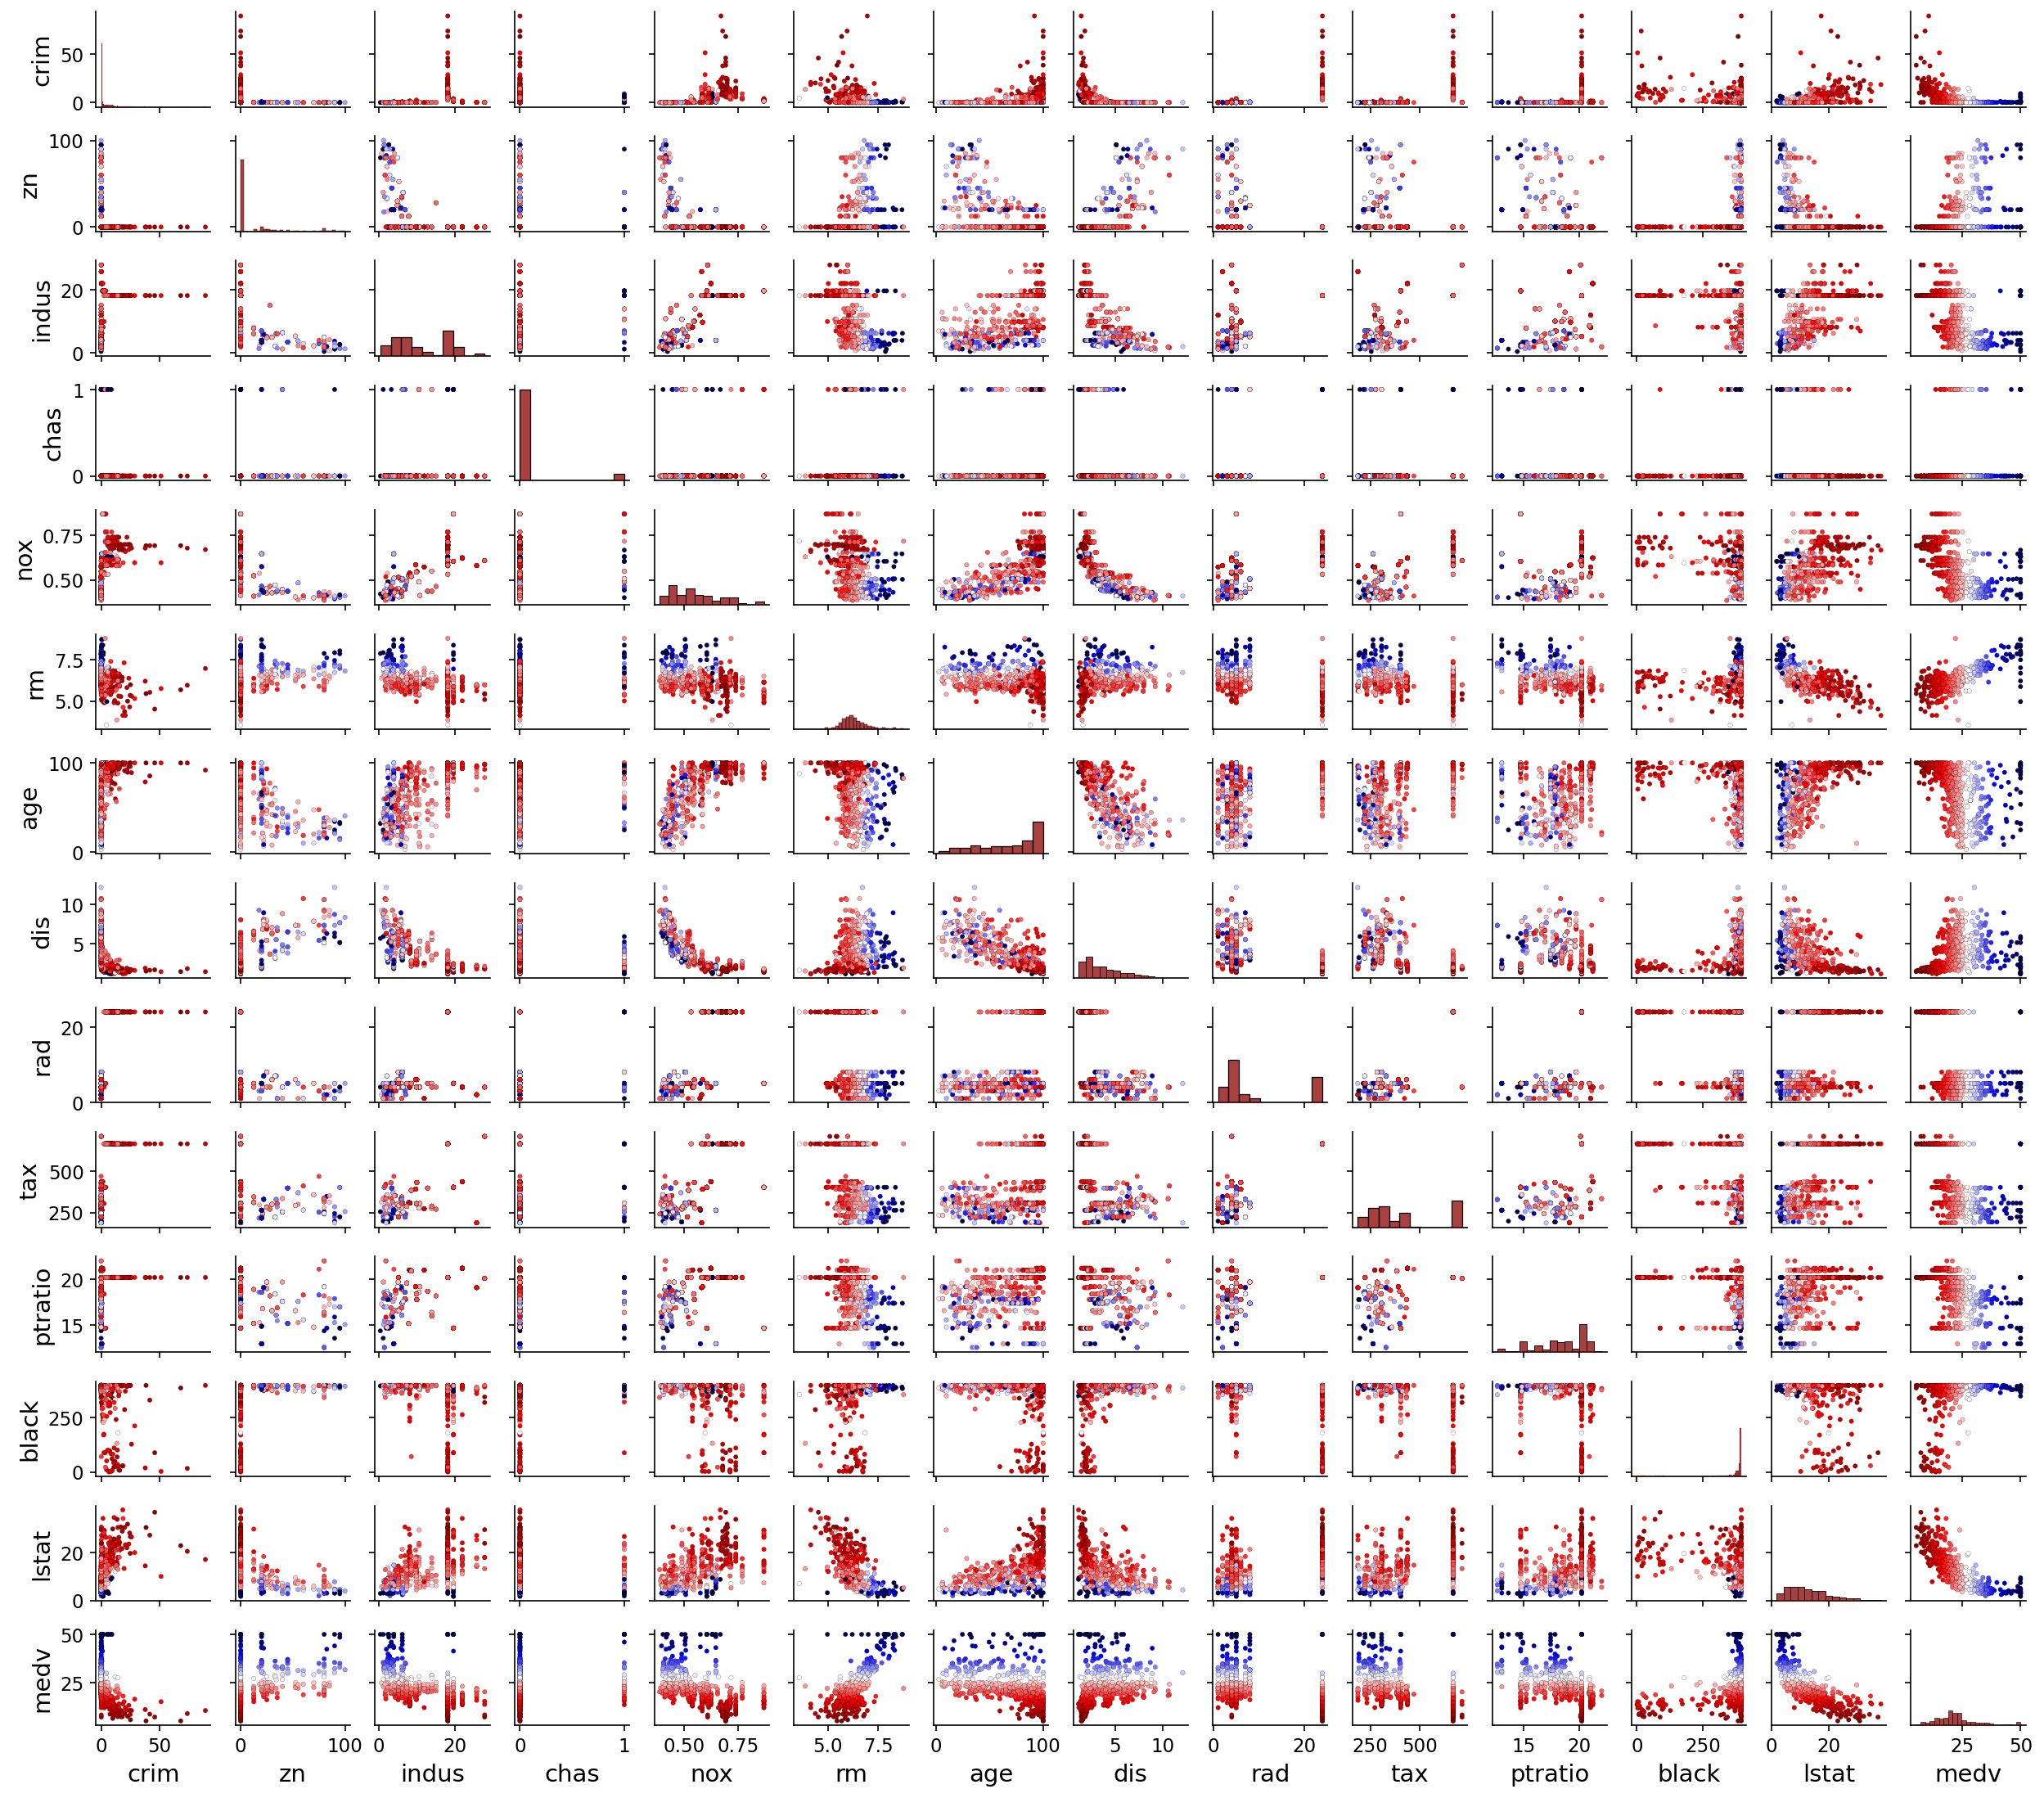

In [11]:
with plt.rc_context():
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 11
    plt.rcParams['ytick.labelsize'] = 11
    
    pp = sns.PairGrid(data=df, height=1)
    plt.gcf().set_size_inches(17,15)
    pp.map_offdiag(sns.scatterplot, hue=df['medv'], palette='seismic_r', s=7, alpha=1,
                        edgecolor='black', linewidth=0.1)
    pp.map_diag(sns.histplot, color='darkred')
    plt.show()

<div class="alert alert-block alert-info">
<a id=''></a>
<b>Observations:</b><br>
    <b>1) medv &rarr; median house value</b><br>
    &ensp;- Clear correlation with: <br>
    &emsp; • a) lstat &rarr; corr = -0.738 <br> 
    &emsp; &ensp; lstat : proportion of economically disadvantaged sections within the town population <br> 
    &emsp; &ensp; Number of low valued homes could be more within a town, thus bringing down median house value (medv)<br>
    &emsp; • b) rm &rarr; corr = -0.695 <br> 
    &emsp; &ensp; rm : average no. of rooms per dwelling<br> 
    &emsp; &ensp; more rooms >> greater living area >> higher value (medv)<br>
    <b>2) crim &rarr; per capita crime rate</b><br>
    &ensp;- Moderate correlation with: <br>
    &emsp; • a) rad &rarr; corr = 0.626 <br> 
    &emsp; &ensp; rad : index of accessibility to radial highways<br> 
    &emsp; • b) tax &rarr; corr = -0.583 <br> 
    &emsp; &ensp; tax : full-value property-tax rate per $10,000<br>
    <b>3) Other associations that are noticable from the scatter plots:</b><br>
    &emsp; a) nox &rarr; concentration of nitrigen oxide particles<br>
    &emsp; &emsp; • age : towns with higher nox also have higher proportion of older buildings<br>
    &emsp; &emsp; • dis : dis is a measure of how close a town is to the business centers<br> 
    &emsp; &emsp; &emsp; &emsp; Unsurprisingly, towns farther away from the business centers are less polluted<br>
    &emsp; b) rm &rarr; lstat : negative relation<br><br>
    <i>Correlation matrix below</i>
</div>

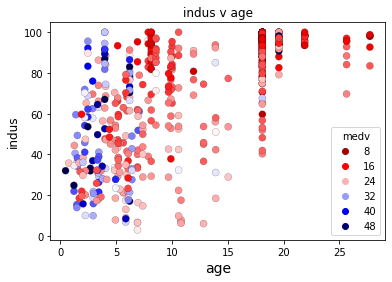

In [12]:
sns.scatterplot(x=df['indus'], y=df['age'], hue=df['medv'], palette='seismic_r', s=50, 
               linewidth=0.15, alpha = 1, edgecolor='k')
plt.title("indus v age", fontsize=12)
plt.ylabel("indus", fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("age", fontsize=14)
plt.yticks(fontsize=10);

#### Correlations

In [13]:
# Correlations >= | 0.55 |
corr = df.corr()
corr.round(3).applymap(lambda x: '-' if abs(x) < 0.55 else x)

crim     zn  indus chas    nox     rm    age    dis    rad    tax  \
crim         1      -      -    -      -      -      -      -  0.626  0.583   
zn           -      1      -    -      -      -  -0.57  0.664      -      -   
indus        -      -      1    -  0.764      -  0.645 -0.708  0.595  0.721   
chas         -      -      -    1      -      -      -      -      -      -   
nox          -      -  0.764    -      1      -  0.731 -0.769  0.611  0.668   
rm           -      -      -    -      -      1      -      -      -      -   
age          -  -0.57  0.645    -  0.731      -      1 -0.748      -      -   
dis          -  0.664 -0.708    - -0.769      - -0.748      1      -      -   
rad      0.626      -  0.595    -  0.611      -      -      -      1   0.91   
tax      0.583      -  0.721    -  0.668      -      -      -   0.91      1   
ptratio      -      -      -    -      -      -      -      -      -      -   
black        -      -      -    -      -      -      -      -      -      -   
lstat        -      -  0.604    -  0.591 -0.614  0.602      -      -      -   
medv         -      -      -    -      -  0.695      -      -      -      -   

        ptratio black  lstat   medv  
crim          -     -      -      -  
zn            -     -      -      -  
indus         -     -  0.604      -  
chas          -     -      -      -  
nox           -     -  0.591      -  
rm            -     - -0.614  0.695  
age           -     -  0.602      -  
dis           -     -      -      -  
rad           -     -      -      -  
tax           -     -      -      -  
ptratio       1     -      -      -  
black         -     1      -      -  
lstat         -     -      1 -0.738  
medv          -     - -0.738      1

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### c) Predictors associated with crime rate
Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

<b><i>crim - variable analysis</i></b>

In [14]:
# Percentiles
perc = df['crim'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95])
perc

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
5%         0.027910
10%        0.038195
25%        0.082045
50%        0.256510
75%        3.677083
90%       10.753000
95%       15.789150
max       88.976200
Name: crim, dtype: float64

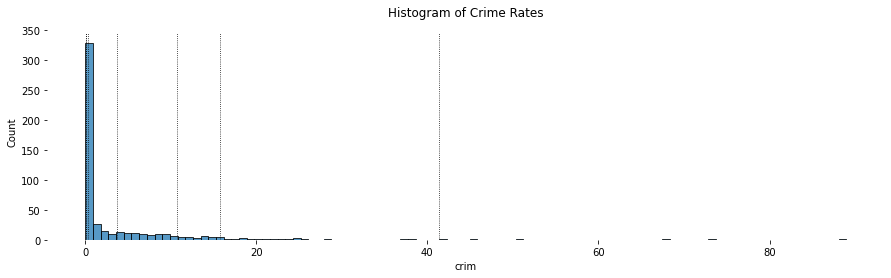

In [15]:
# Histogram
plt.gcf().set_size_inches(15,4)
plt.gca().set(frame_on=False)
sns.histplot(df.crim).set(title='Histogram of Crime Rates')
min_ylim, max_ylim = plt.ylim()
plt.vlines(x=np.percentile(df['crim'], [10,25,50,75,90,95,99]), ymin=min_ylim, ymax=max_ylim, 
           colors='k', ls=':', lw=0.8);

In [16]:
# Correlation
corr.loc['crim'].round(3)

crim       1.000
zn        -0.200
indus      0.407
chas      -0.056
nox        0.421
rm        -0.219
age        0.353
dis       -0.380
rad        0.626
tax        0.583
ptratio    0.290
black     -0.385
lstat      0.456
medv      -0.388
Name: crim, dtype: float64

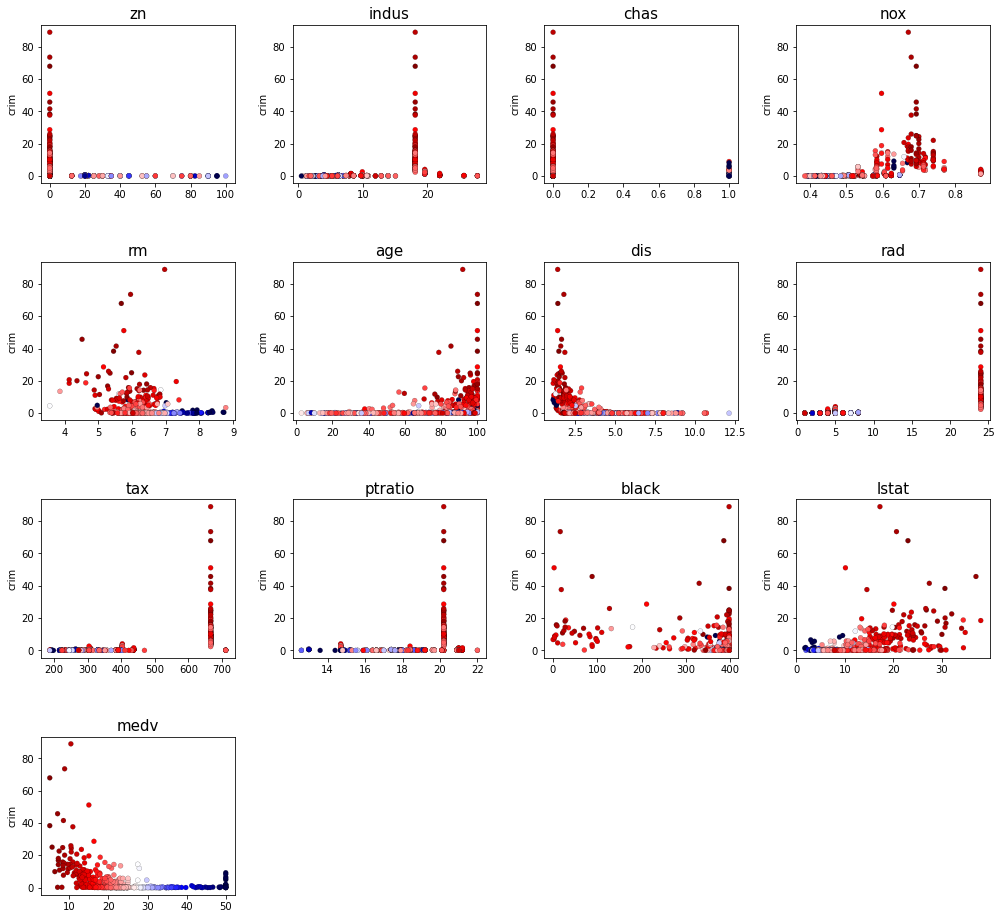

In [17]:
# Scatter plots with crim
base_var = 'crim'
vars = df.columns[~df.columns.isin(['crim'])].tolist()
xlabels = vars
ylabels = [base_var] * len(xlabels)

f, axes = plt.subplots(4, 4, figsize=(17, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

r = 0
c = 0
for i in range(len(xlabels)):
    plt.sca(axes[r,c])
    var = vars[i]
    sns.scatterplot(y=df[base_var], x=df[var], hue=df['medv'], palette='seismic_r', s=25, 
               linewidth=0.15, alpha = 1, edgecolor='k', legend=False)
    plt.title(var, fontsize=15)
    plt.xlabel('')
    
    if c == 3:
        c = 0
        r += 1
        continue
    else:
        c += 1
        
for k in range(1,4):
    f.delaxes(axes[3,k])

<div class="alert alert-block alert-info">
<a id='obs-crim'></a>
<b>Observations:</b><br>
    - crim has a highly positively skewed distribution ranging from 0.006 to 89. 95% of the towns have crim &lt; 15.8<br>
    - crim has a moderately strong positive correlation with rad (0.626) and tax (0.583)<br>
    <u><i>Scatter plots</i></u><br>
    - <b>zn</b> = 0 has towns that do not have any residential land > 25000 sq ft. 74% (372/506) towns come under this category.<br>
    &ensp;Towns with large residential plots (zn $\neq$ 0) have very low crime rate with max crim = 0.82526 (65th percentile (or p65) of overall crim)<br>
    - <b>indus</b> &rarr; proportion of non-retail business acres per town<br>
    &ensp; indus = 18.1 is the category with the large spread of crim.<br>
    &ensp; 26% (132/506) of the towns have indus = 18.1.<br>
    &ensp; Maximum crime rate in other towns is 4% (p76).<br>
    - <b>chas</b> = 1 denotes towns that are bounded by the Charles River.<br> 
    &ensp; Only 7% of the towns fall under this category. And crime rate in such towns is spread enough which would lead us to conclude that this variable is inconsequential for crime rate.<br>
    - <b>nox</b> &rarr; nitrogen oxides concentration (parts per 10 million)<br>
    &ensp; Towns with high nox levels have larger spread of crime rates.<br>
    - <b>rm</b> &rarr; Average number of  rooms per dwelling<br>
    &ensp; rm has an unclear relationship with crim, although towns with low rm tend to have a higher upper range of crim.<br>
    - <b>age</b> &rarr; proportion of owner-occupied units built prior to 1940<br>
    &ensp; Towns with a higher proportion of older buildings have wider spread crime rates.<br>
    &ensp; Although age has a low correlation with crim (0.353), scatter plot suggests that their could be a non-linear relationship between them.<br>
    - <b>dis</b> &rarr; weighted mean of distances to five Boston employment centres<br> 
    &ensp; Towns that are very close to the employment centers have the highest crime rates.<br>
    - <b>rad</b> &rarr; index of accessibility to radial highways<br>
    &ensp; Crime is significantly high in the towns with rad index = 24, which constitute 26% of the data.<br>
    &ensp; rad also has the highest correlation with crim @ 0.626. In towns with rad $\neq$ 24, max crim is 4.0974 (p75)<br>
    - <b>tax</b> &rarr; full-value property-tax rate per \$10,000<br>
    &ensp; tax has the second highest correlation with crim @ 0.583 <br>
    &ensp; 26% of the towns have tax = 666, which also has the highest crime rates.<br>
    &ensp; Maximum crim in other towns is 4.0974 (p75)<br>
    - <b>ptratio</b> &rarr; pupil-teacher ratio by town<br>
    &ensp; Towns with high crim fall under ptratio = 20.2 which makes up the largest chunk of the data at 28%.<br>
    - <b>lstat</b> &rarr; lower status of the population (percent)<br> 
    &ensp; lstat has a roughly funnel shaped scatter plot pattern with crim.<br>
    &ensp; Some of towns with higher proportion of economically disadvantaged sections suffer from relatively higher incidences of crim.<br>
    &ensp; Correlation of crim with lstat is 0.421, which is neither strong nor weak. This is so because many of the towns with moderately high lstat have low crim as well as high crime rates, but the balance tilts towards high crim as lstat gets higher and higher.<br>
    - <b>medv</b> &rarr; median value of owner-occupied homes in $1000s<br>
    &ensp; There appears to be a curvi-linear relationship between medv and crim and correlation = -0.388<br>
    &ensp; Towns with higher medv have lower crim numbers.



*Note* : $p_i$ denotes $i^{th}$ percentile<br><br>
    
*Workings below*
</div>


[go to toc](#toc2)

##### --&nbsp; Workings &nbsp; --------------------------------------------------------------

###### zn

In [18]:
# Frequency table
fd = pd.concat([df.zn.value_counts(sort=False), 
           round(df.zn.value_counts(sort=False, normalize=True)*100)], 
               axis=1, keys=['freq','%']).astype(np.int).sort_index()
fd = fd.sort_values(by='freq', ascending=False)
fd.T

0.0    20.0   80.0   22.0   12.5   25.0   40.0   30.0   45.0   90.0   \
freq    372     21     15     10     10     10      7      6      6      5   
%        74      4      3      2      2      2      1      1      1      1   

      ...  55.0   28.0   52.5   35.0   34.0   82.5   85.0   18.0   17.5   \
freq  ...      3      3      3      3      3      2      2      1      1   
%     ...      1      1      1      1      1      0      0      0      0   

      100.0  
freq      1  
%         0  

[2 rows x 26 columns]

In [19]:
# Maximum crim in zn other than 0
a = max(df.crim[df.zn != 0])
print(a)

# Percentile
round(ptile(df.crim, a, 'weak'), 2)

0.82526


64.43

###### indus

In [20]:
min(df.indus), max(df.indus)

(0.46, 27.74)

In [21]:
# Frequency table
fd = pd.concat([df.indus.value_counts(sort=False), 
           round(df.indus.value_counts(sort=False, normalize=True)*100)], 
               axis=1, keys=['freq','%']).astype(int).sort_index()
fd = fd.sort_values(by='freq', ascending=False)
fd.T

18.10  19.58  8.14   6.20   21.89  9.90   3.97   8.56   10.59  5.86   \
freq    132     30     22     18     15     12     12     11     11     10   
%        26      6      4      4      3      2      2      2      2      2   

      ...  0.74   2.01   2.02   4.15   2.25   2.31   2.97   3.75   4.00   \
freq  ...      1      1      1      1      1      1      1      1      1   
%     ...      0      0      0      0      0      0      0      0      0   

      0.46   
freq      1  
%         0  

[2 rows x 76 columns]

In [22]:
# Frequency table with class intervals
ci = pd.cut(df.indus, bins=range(0, int(max(df.indus)//10+1)*10, 2))
fd = pd.concat([ci.value_counts(sort=False), round(ci.value_counts(sort=False, normalize=True)*100)], 
               axis=1, keys=['freq', '%']).astype(int).sort_index()
fd.T

(0, 2]  (2, 4]  (4, 6]  (6, 8]  (8, 10]  (10, 12]  (12, 14]  (14, 16]  \
freq      20      73      62      62       53        29        15         3   
%          4      14      12      12       10         6         3         1   

      (16, 18]  (18, 20]  (20, 22]  (22, 24]  (24, 26]  (26, 28]  
freq         0       162        15         0         7         5  
%            0        32         3         0         1         1

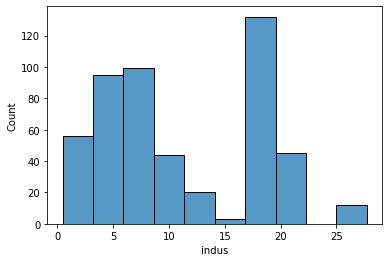

In [23]:
sns.histplot(df.indus);

In [24]:
# Frequency table of indus Towns with crim > 5
df.indus[df.crim > 5].value_counts()

18.1    106
Name: indus, dtype: int64

In [25]:
# max crim in indus <> 18.1
a = max(df.crim[df.indus != 18.1])
print(a)
round(ptile(df.crim, a), 2)

4.0974


76.48

###### chas

In [26]:
df.chas.value_counts()

0.0    471
1.0     35
Name: chas, dtype: int64

###### nox

In [27]:
min(df.nox), max(df.nox)

(0.385, 0.871)

In [28]:
# Frequency table
fd = pd.concat([df.nox.value_counts(sort=False), 
                round(df.nox.value_counts(sort=False, normalize=True)*100)], 
                axis=1).astype(int).sort_index()
fd.columns = ['freq', '%']
fd = fd.sort_values(by='freq', ascending=False)
fd.T

0.5380  0.7130  0.4370  0.8710  0.6240  0.4890  0.6930  0.6050  0.7400  \
freq      23      18      17      16      15      15      14      14      13   
%          5       4       3       3       3       3       3       3       3   

      0.5440  ...  0.4379  0.4690  0.4840  0.4150  0.4350  0.4220  0.3940  \
freq      12  ...       2       2       2       2       1       1       1   
%          2  ...       0       0       0       0       0       0       0   

      0.3890  0.5180  0.3850  
freq       1       1       1  
%          0       0       0  

[2 rows x 81 columns]

In [29]:
# Frequency table with class intervals
ci = pd.cut(df.nox, bins=np.arange(0.3, 0.9, 0.1))
fd = pd.concat([ci.value_counts(sort=False), round(ci.value_counts(sort=False, normalize=True)*100)], 
               axis=1).astype(int).sort_index()
fd.columns = ['freq', '%']
fd.T

(0.3, 0.4]  (0.4, 0.5]  (0.5, 0.6]  (0.6, 0.7]  (0.7, 0.8]  (0.8, 0.9]
freq          11         181         149         104          45          16
%              2          36          29          21           9           3

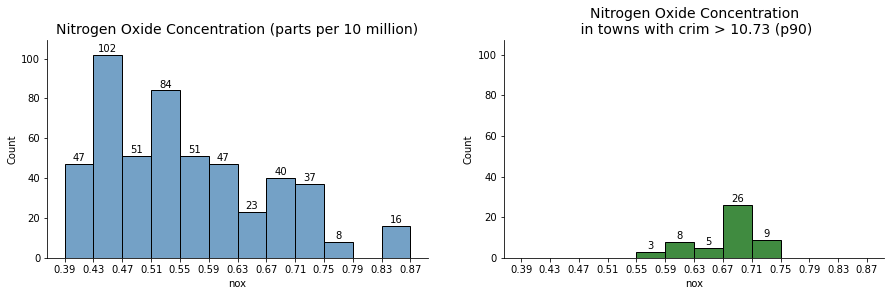

In [30]:
f, axs = plt.subplots(1, 2, figsize=(15, 4))
bins = np.histogram_bin_edges(df['nox'], bins='fd')
# bins = np.arange(0.30001,1,0.05)
a = sns.histplot(df['nox'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.nox[df.crim > 10.73], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Nitrogen Oxide Concentration (parts per 10 million)', fontsize=14)
axs[1].set_title('Nitrogen Oxide Concentration\n in towns with crim > 10.73 (p90)', fontsize=14)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    for p in ax.patches:
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h}\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
    ax.set_xticks(bins)
    ax.set_xticklabels(['{:,.2f}'.format(x) for x in bins])
plt.show()

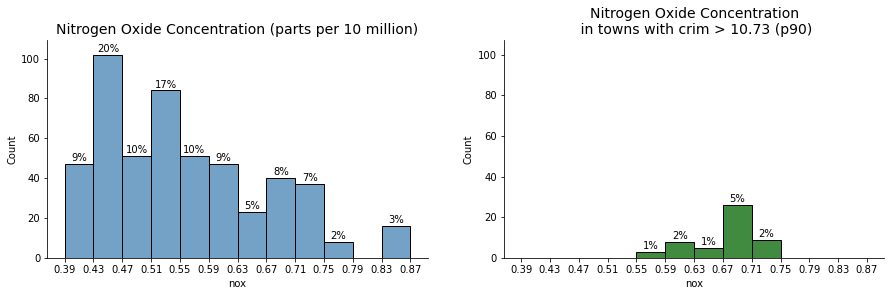

In [31]:
f, axs = plt.subplots(1, 2, figsize=(15, 4))
bins = np.histogram_bin_edges(df['nox'], bins='fd')
a = sns.histplot(df['nox'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.nox[df.crim > 10.73], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Nitrogen Oxide Concentration (parts per 10 million)', fontsize=14)
axs[1].set_title('Nitrogen Oxide Concentration\n in towns with crim > 10.73 (p90)', fontsize=14)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    for p in ax.patches:
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h/len(df)*100:.0f}%\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
    ax.set_xticks(bins)
    ax.set_xticklabels(['{:,.2f}'.format(x) for x in bins])
plt.show()

###### rm

In [32]:
min(df.rm), max(df.rm)

(3.561, 8.78)

In [33]:
# Frequency table
fd = pd.concat([df.rm.value_counts(sort=False), 
                round(df.rm.value_counts(sort=False, normalize=True)*100)], 
                axis=1).astype(int).sort_index()
fd.columns = ['freq', '%']
fd = fd.sort_values(by='freq', ascending=False)
fd.T

6.417  6.405  6.167  6.229  5.713  6.127  6.004  6.122  7.185  5.936  \
freq      3      3      3      3      3      3      2      2      2      2   
%         1      1      1      1      1      1      0      0      0      0   

      ...  6.006  6.003  5.998  5.990  5.987  5.986  5.985  5.981  5.976  \
freq  ...      1      1      1      1      1      1      1      1      1   
%     ...      0      0      0      0      0      0      0      0      0   

      8.780  
freq      1  
%         0  

[2 rows x 446 columns]

In [34]:
# Frequency table with class intervals
ci = pd.cut(df.rm, bins=np.arange(3,9,0.5))
fd = pd.concat([ci.value_counts(), round(ci.value_counts(normalize=True)*100)], axis=1, 
               keys=['freq','%']).astype(int).sort_index()
fd.T

(3.0, 3.5]  (3.5, 4.0]  (4.0, 4.5]  (4.5, 5.0]  (5.0, 5.5]  (5.5, 6.0]  \
freq           0           2           3          11          26         131   
%              0           0           1           2           5          26   

      (6.0, 6.5]  (6.5, 7.0]  (7.0, 7.5]  (7.5, 8.0]  (8.0, 8.5]  
freq         181          88          37          14          10  
%             36          17           7           3           2

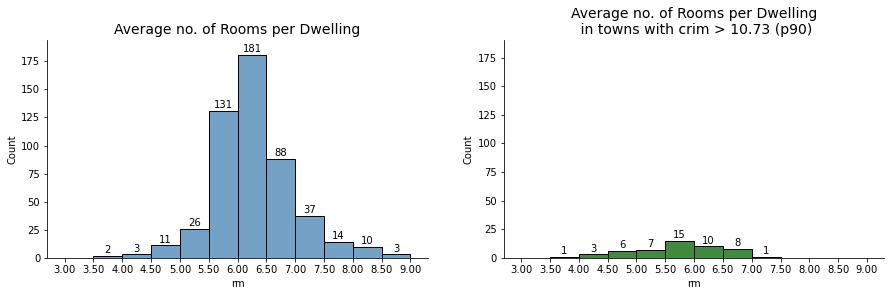

In [35]:
f, axs = plt.subplots(1, 2, figsize=(15, 4))
# bins = np.histogram_bin_edges(df['rm'], bins='fd')
bins = np.arange(3.001, 9.501, 0.5)
a = sns.histplot(df['rm'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.rm[df.crim > 10.73], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Average no. of Rooms per Dwelling', fontsize=14)
axs[1].set_title('Average no. of Rooms per Dwelling\n in towns with crim > 10.73 (p90)', fontsize=14)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    for p in ax.patches:
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h}\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
    ax.set_xticks(bins)
    ax.set_xticklabels(['{:,.2f}'.format(x) for x in bins])
plt.show()

###### age

In [36]:
min(df.age), max(df.age)

(2.9, 100.0)

In [37]:
# Frequency table for age
ci = pd.cut(df.age, bins=np.arange(0,101,10))
fd = pd.concat([ci.value_counts(), round(ci.value_counts(normalize=True)*100)], axis=1, 
               keys=['freq','%']).astype(int).sort_index()

# crim > 10.73
ci = pd.cut(df.age[df.crim > 10.73], bins=np.arange(0,101,10))
fd2 = pd.concat([ci.value_counts(), round(ci.value_counts(normalize=True)*100)], axis=1,
               keys=['freq2','%2']).astype(int).sort_index()
pd.concat([fd, fd2], axis=1)

freq   %  freq2  %2
(0, 10]      14   3      0   0
(10, 20]     20   4      0   0
(20, 30]     30   6      0   0
(30, 40]     45   9      0   0
(40, 50]     38   8      0   0
(50, 60]     38   8      2   4
(60, 70]     34   7      0   0
(70, 80]     47   9      3   6
(80, 90]     72  14      6  12
(90, 100]   168  33     40  78

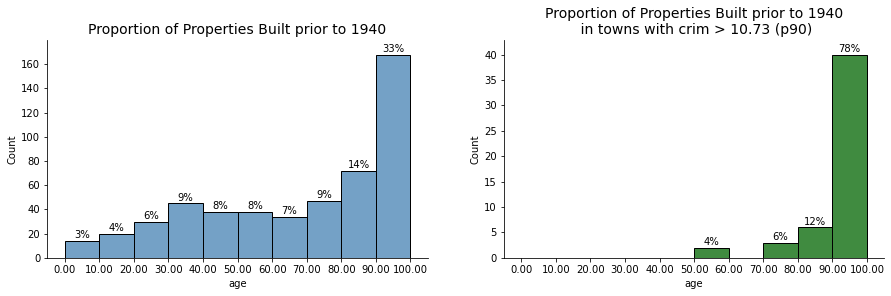

In [38]:
f, axs = plt.subplots(1, 2, figsize=(15, 4))
# bins = np.histogram_bin_edges(df['age'], bins='auto')
bins = np.arange(0.001, 110.001, 10)
a = sns.histplot(df['age'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.age[df.crim > 10.73], ax=axs[1], color='darkgreen', bins= bins)
axs[0].set_title('Proportion of Properties Built prior to 1940', fontsize=14)
axs[1].set_title('Proportion of Properties Built prior to 1940\n in towns with crim > 10.73 (p90)', 
                 fontsize=14)
# axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    tot = sum([rect.get_height() for rect in ax.patches])
    for p in ax.patches: 
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h/tot*100:.0f}%\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
    ax.set_xticks(bins)
    ax.set_xticklabels(['{:,.2f}'.format(x) for x in bins])
plt.show()

In [39]:
def applyBoxPlotStyle(fig, b=True):
    sns.despine(left=True, bottom=b, top=True, right=True)
    plt.setp(fig.lines, color='k', linewidth=0.5)
    plt.setp(fig.artists, edgecolor='k', linewidth=0.5)

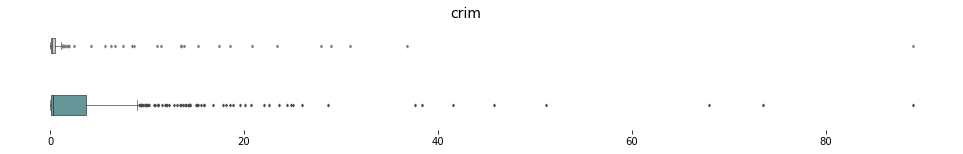

In [40]:
f, axs = plt.subplots(nrows=2, sharex=True, figsize=(17,2))
plt.suptitle('crim', fontsize=14)

ax1 = plt.subplot(211)
sns.boxplot(x=df.crim[df.age<80], width=0.3, color='thistle', fliersize=2)
applyBoxPlotStyle(ax1)
plt.axis('off')

ax2 = plt.subplot(212)
sns.boxplot(x=df.crim, width=0.4, color='cadetblue', fliersize=2)
applyBoxPlotStyle(ax2)
ax2.tick_params(left=False)
ax2.set(xlabel='');

###### dis

In [41]:
min(df.dis), max(df.dis)

(1.1296, 12.1265)

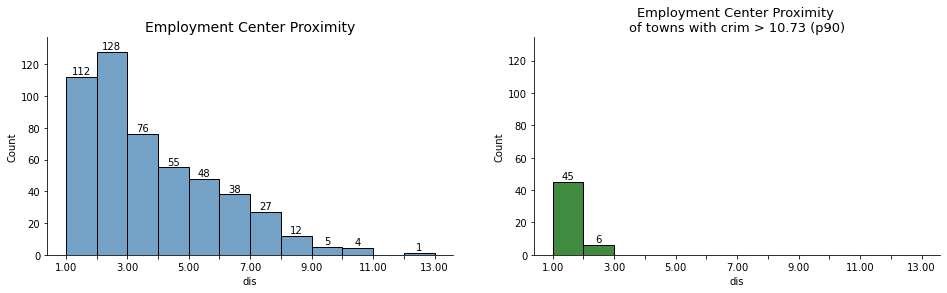

In [42]:
f, axs = plt.subplots(1, 2, figsize=(16, 4))
# bins = np.histogram_bin_edges(df['dis'], bins='auto')
bins = np.arange(1.001, 14.001, 1)
a = sns.histplot(df['dis'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.dis[df.crim > 10.73], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Employment Center Proximity', fontsize=14)
axs[1].set_title('Employment Center Proximity \nof towns with crim > 10.73 (p90)', 
                 fontsize=13)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    tot = sum([rect.get_height() for rect in ax.patches])
    for p in ax.patches: 
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
#             ax.text(x+w/2, h, f'{h/len(df)*100:.0f}%\n', ha='center', va='center', size=10)
            ax.text(x+w/2, h, f'{h}\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
    ax.set_xticks(bins)
    tempL = ['{:,.2f}'.format(x) for x in bins]
    tempL = ['' if k%2 else t for k,t in enumerate(tempL)]
    ax.set_xticklabels(tempL)
plt.show()

In [43]:
sum([rect.get_height() for rect in axs[1].patches])

51

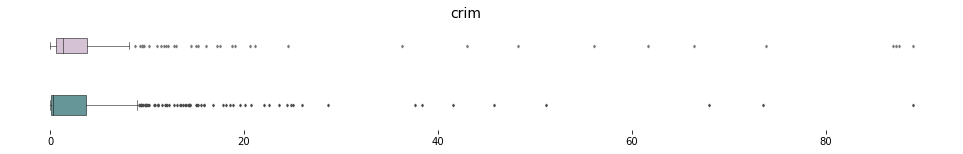

In [44]:
f, axs = plt.subplots(nrows=2, sharex=True, figsize=(17,2))
plt.suptitle('crim', fontsize=14)

ax1 = plt.subplot(211)
sns.boxplot(x=df.crim[df.dis>3], width=0.3, color='thistle', fliersize=2)
applyBoxPlotStyle(ax1)
plt.axis('off')

ax2 = plt.subplot(212)
sns.boxplot(x=df.crim, width=0.4, color='cadetblue', fliersize=2)
applyBoxPlotStyle(ax2)
ax2.tick_params(left=False)
ax2.set(xlabel='');

###### rad

In [45]:
fd = pd.concat([df.rad.value_counts(), round(df.rad.value_counts(normalize=True)*100)], 
              axis=1, keys=['freq','%']).astype(int).sort_index()
fd.T

1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   24.0
freq    20    24    38   110   115    26    17    24   132
%        4     5     8    22    23     5     3     5    26

In [46]:
# Max crim in towns with rad <> 24
a = max(df.crim[df.rad != 24])
print(a)
round(ptile(df.crim, a), 2)

4.0974


76.48

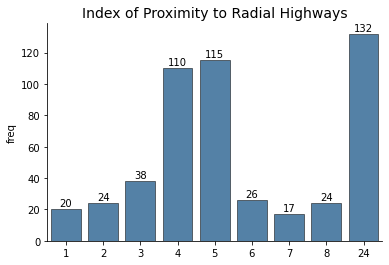

In [47]:
# Bar plot
splot = sns.barplot(y=fd.freq, x=fd.index.astype(int), color='steelblue', edgecolor='k', 
            linewidth=0.5)
sns.despine(top=True)
plt.title('Index of Proximity to Radial Highways', fontsize=14)
for p in splot.patches:
    x, w, h = p.get_x(), p.get_width(), p.get_height()
    splot.annotate(f'{h:.0f}', (x+w/2, h), ha='center', va='center', size=10, 
                   xytext=(0,6), textcoords='offset points')

###### tax

In [48]:
min(df.tax), max(df.tax)

(187.0, 711.0)

In [49]:
fd = pd.concat([df.tax.value_counts(), round(df.tax.value_counts(normalize=True)*100)], 
              axis=1, keys=['freq','%']).astype(int).sort_index()
fd = fd.sort_values(by='freq', ascending=False)
fd.index = fd.index.astype(int)
fd.T

666  307  403  437  304  398  264  384  277  330  ...  469  198  226  \
freq  132   40   30   15   14   12   12   11   11   10  ...    1    1    1   
%      26    8    6    3    3    2    2    2    2    2  ...    0    0    0   

      255  244  256  351  280  285  187  
freq    1    1    1    1    1    1    1  
%       0    0    0    0    0    0    0  

[2 rows x 66 columns]

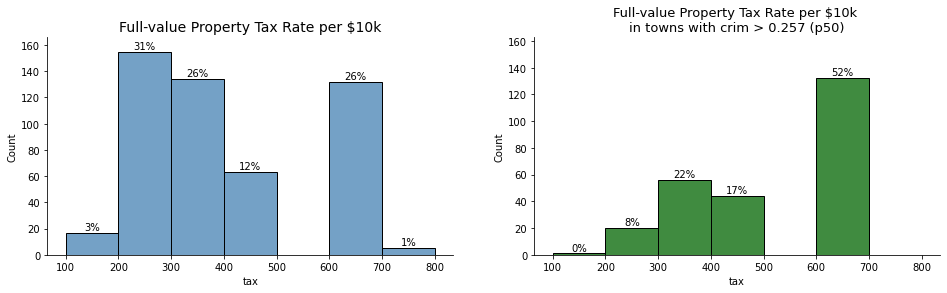

In [50]:
f, axs = plt.subplots(1, 2, figsize=(16, 4))
bins = np.histogram_bin_edges(df['tax'], bins=np.arange(100.001,850.001,100))
a = sns.histplot(df['tax'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.tax[df.crim > 0.257], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Full-value Property Tax Rate per $10k', fontsize=14)
axs[1].set_title('Full-value Property Tax Rate per $10k \nin towns with crim > 0.257 (p50)', 
                 fontsize=13)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    tot = sum([rect.get_height() for rect in ax.patches])
    for p in ax.patches: 
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h/tot*100:.0f}%\n', ha='center', va='center', size=10)
#             ax.text(x+w/2, h, f'{h}\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
    ax.set_xticks(bins)
    tempL = ['{:,.0f}'.format(x) for x in bins]
    ax.set_xticklabels(tempL)
plt.show()

In [51]:
# Max crim in towns with tax <> 666
a = max(df.crim[df.tax != 666])
print(a)
round(ptile(df.crim, a), 2)

4.0974


76.48

###### ptratio

In [52]:
min(df.ptratio), max(df.ptratio)

(12.6, 22.0)

In [53]:
fd = pd.concat([df.ptratio.value_counts(), round(df.ptratio.value_counts(normalize=True)*100, 2)], 
               axis=1, keys=['freq','%']).astype(int).sort_index()
fd.sort_values(by='freq', ascending=False).T

20.2  14.7  21.0  17.8  19.2  17.4  18.6  19.1  18.4  16.6  ...  18.8  \
freq   140    34    27    23    19    18    17    17    16    16  ...     2   
%       27     6     5     4     3     3     3     3     3     3  ...     0   

      15.9  15.6  22.0  17.3  15.5  15.1  14.4  21.1  13.6  
freq     2     2     2     1     1     1     1     1     1  
%        0     0     0     0     0     0     0     0     0  

[2 rows x 46 columns]

In [54]:
# Frequency table with class intervals
ci = pd.cut(df.ptratio, bins=np.arange(12, 23, 1))
fd = pd.concat([ci.value_counts(), round(ci.value_counts(normalize=True)*100)], 
               axis=1, keys=['freq','%']).astype(int).sort_index()
fd.T

(12, 13]  (13, 14]  (14, 15]  (15, 16]  (16, 17]  (17, 18]  (18, 19]  \
freq        15         1        42        27        40        65        63   
%            3         0         8         5         8        13        12   

      (19, 20]  (20, 21]  (21, 22]  
freq        52       183        18  
%           10        36         4

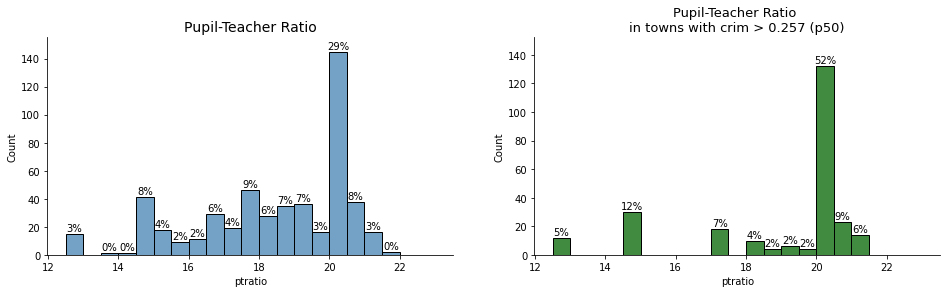

In [55]:
f, axs = plt.subplots(1, 2, figsize=(16, 4))
# bins = np.histogram_bin_edges(df['ptratio'], bins='auto')
bins = np.arange(12.501, 23.001, 0.5)
a = sns.histplot(df['ptratio'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.ptratio[df.crim > 0.257], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Pupil-Teacher Ratio', fontsize=14)
axs[1].set_title('Pupil-Teacher Ratio \nin towns with crim > 0.257 (p50)', 
                 fontsize=13)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    tot = sum([rect.get_height() for rect in ax.patches])
    for p in ax.patches: 
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h/tot*100:.0f}%\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
plt.show()

###### black

In [56]:
min(df.black), max(df.black)

(0.32, 396.9)

In [57]:
fd = pd.concat([df.black.value_counts(), round(df.black.value_counts(normalize=True)*100)],
               axis=1, keys=['freq','%']).astype(int).sort_index()
fd.sort_values(by='freq', ascending=False).T

396.90  393.74  395.24  341.60  395.56  391.34  388.45  395.11  374.71  \
freq     121       3       3       2       2       2       2       2       2   
%         24       1       1       0       0       0       0       0       0   

      393.37  ...  372.08  374.68  374.56  374.43  373.66  372.92  372.80  \
freq       2  ...       1       1       1       1       1       1       1   
%          0  ...       0       0       0       0       0       0       0   

      372.75  372.49  385.76  
freq       1       1       1  
%          0       0       0  

[2 rows x 357 columns]

In [58]:
ci = pd.cut(df.black, bins=np.arange(0,450,50))
fd = pd.concat([ci.value_counts(), round(ci.value_counts(normalize=True)*100)], 
              axis=1, keys=['freq','%']).astype(int).sort_index()
fd.T

(0, 50]  (50, 100]  (100, 150]  (150, 200]  (200, 250]  (250, 300]  \
freq       20         11           5           3           6           9   
%           4          2           1           1           1           2   

      (300, 350]  (350, 400]  
freq          28         424  
%              6          84

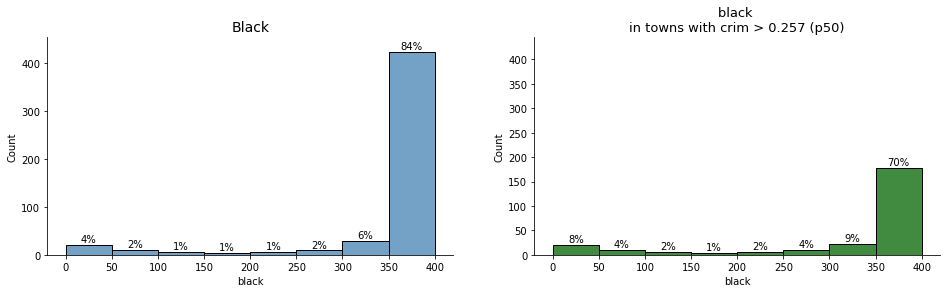

In [59]:
f, axs = plt.subplots(1, 2, figsize=(16, 4))
# bins = np.histogram_bin_edges(df['black'], bins='fd')
bins = np.arange(0.001, 450.001, 50)
a = sns.histplot(df['black'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.black[df.crim > 0.257], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Black', fontsize=14)
axs[1].set_title('black \nin towns with crim > 0.257 (p50)', 
                 fontsize=13)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    tot = sum([rect.get_height() for rect in ax.patches])
    for p in ax.patches: 
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h/tot*100:.0f}%\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
plt.show()

###### lstat

In [60]:
min(df.lstat), max(df.lstat)

(1.73, 37.97)

In [61]:
fd = pd.concat([df.lstat.value_counts(), round(df.lstat.value_counts(normalize=True)*100)],
              axis=1, keys=['freq','%']).astype(int).sort_index()
fd.sort_values(by='freq', ascending=False).T

18.13  8.05   7.79   6.36   14.10  6.58   4.45   13.44  4.56   4.59   \
freq      3      3      3      3      3      2      2      2      2      2   
%         1      1      1      1      1      0      0      0      0      0   

      ...  9.38   9.29   9.28   9.25   9.22   9.16   9.14   9.10   9.09   \
freq  ...      1      1      1      1      1      1      1      1      1   
%     ...      0      0      0      0      0      0      0      0      0   

      37.97  
freq      1  
%         0  

[2 rows x 455 columns]

In [62]:
ci = pd.cut(df.lstat, bins=np.arange(0,45,5))
fd = pd.concat([ci.value_counts(), round(ci.value_counts(normalize=True)*100)],
               axis=1, keys=['freq','%']).astype(int).sort_index()

ci = pd.cut(df.lstat[df.crim > 0.257], bins=np.arange(0,45,5))
fd2 = pd.concat([ci.value_counts(), round(ci.value_counts(normalize=True)*100)],
               axis=1, keys=['freq2','%2']).astype(int).sort_index()

pd.concat([fd, fd2], axis=1)

freq   %  freq2  %2
(0, 5]      62  12     19   8
(5, 10]    157  31     37  15
(10, 15]   125  25     66  26
(15, 20]    88  17     64  25
(20, 25]    40   8     37  15
(25, 30]    22   4     19   8
(30, 35]    10   2      9   4
(35, 40]     2   0      2   1

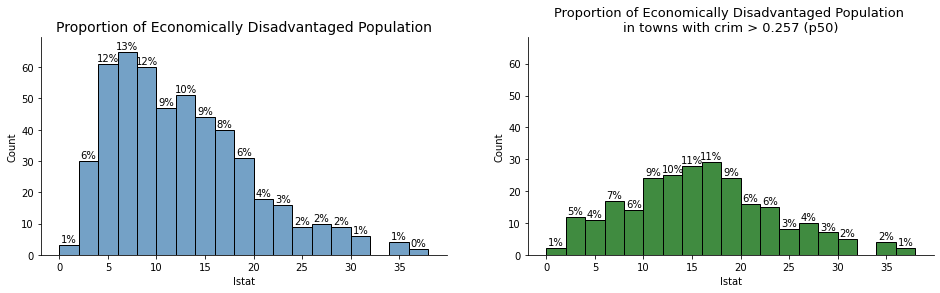

In [63]:
f, axs = plt.subplots(1, 2, figsize=(16, 4))
# bins = np.histogram_bin_edges(df['lstat'], bins='fd')
bins = np.arange(0.001, 40.001, 2)
a = sns.histplot(df['lstat'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.lstat[df.crim > 0.257], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Proportion of Economically Disadvantaged Population', fontsize=14)
axs[1].set_title('Proportion of Economically Disadvantaged Population \nin towns with crim > 0.257 (p50)', 
                 fontsize=13)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    tot = sum([rect.get_height() for rect in ax.patches])
    for p in ax.patches: 
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h/tot*100:.0f}%\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
plt.show()

###### medv

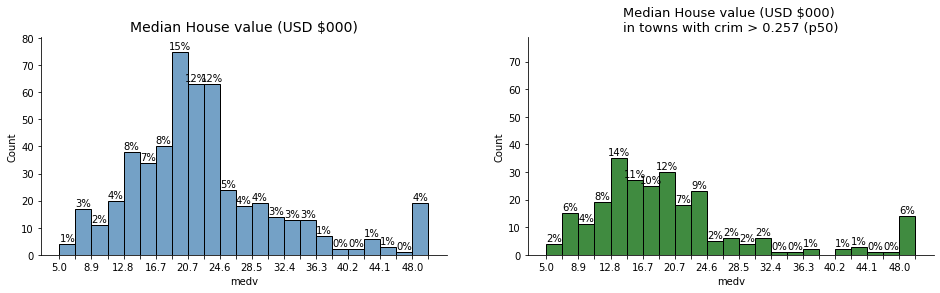

In [64]:
f, axs = plt.subplots(1, 2, figsize=(16, 4))
bins = np.histogram_bin_edges(df['medv'], bins='fd')
# bins = np.arange(4.001, 52.001, 2)
a = sns.histplot(df['medv'], ax=axs[0], color='steelblue', bins=bins)
b = sns.histplot(df.medv[df.crim > 0.257], ax=axs[1], color='darkgreen', bins=bins)
axs[0].set_title('Median House value (USD $000)', fontsize=14)
axs[1].set_title('Median House value (USD $000) \nin towns with crim > 0.257 (p50)', 
                 fontsize=13)
axs[1].set_ylim(axs[0].get_ylim())
sns.despine(right=True, top=True)
for ax in axs:
    ax.set_xticks(bins)
#     ax.set_xticklabels(bins.round(1), rotation=45)
    ax.set_xticklabels([round(bins[i],1) if i%2 == 0 else "" for i in range(len(bins))])
    tot = sum([rect.get_height() for rect in ax.patches])
    for p in ax.patches: 
        x, w, h = p.get_x(), p.get_width(), p.get_height()
        if h > 0:
            ax.text(x+w/2, h, f'{h/tot*100:.0f}%\n', ha='center', va='center', size=10)
    ax.margins(y=0.07)
plt.show()

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Defined functions

##### Fuction to plot a variable against all others with medv hue (red - blue : low - high)

In [65]:
def multiplot(data, yvar, numcols, plot_dim=None, huedata=None):
    vars = data.columns[~data.columns.isin([yvar])].tolist()
    n = len(vars)
    rws = n//numcols if n%numcols == 0 else (n//numcols)+1
    plot_dim = (17, rws*3.5) if plot_dim is None else plot_dim
    
    f, axs = plt.subplots(rws, numcols, figsize=plot_dim)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    r, c = 0, 0
    for i in range(n):
        plt.sca(axs[r,c])
        var = vars[i]
        if huedata is None:
            sns.scatterplot(x=data[var], y=data[yvar], legend=False)
        else:
            sns.scatterplot(x=data[var], y=data[yvar], hue=huedata, palette='seismic_r', s=25,
                        linewidth=0.15, alpha=1, edgecolor='k', legend=False)
        plt.title(var, fontsize=15)
        plt.xlabel('')
        
        if c == numcols-1:
            c = 0
            r += 1
            continue
        else:
            c += 1
        
    extra_grids = rws*numcols - n
    for k in range(numcols-extra_grids, numcols):
        f.delaxes(axs[r,k])

##### Function to create histogram with value labels and percentile markers

In [66]:
def histplot_custom(data, nclass='auto', title='Histogram', labels=True, perc=False, 
                    plot_dim=(7,4), quants=None, axis=False, roff=1, axis_jump=0):
    if isinstance(nclass, str):
        bins = np.histogram_bin_edges(data, bins=nclass)
    else:
        bins = nclass
    plt.gcf().set_size_inches(plot_dim)
    a = sns.histplot(data, color='thistle', bins=bins)
    plt.title(title, fontsize=14)
    a.set_xticks(bins)
    if axis == True:
        a.set_xticks(bins) 
        a.set_xticklabels([round(bins[i], roff) if i % axis_jump == 0 else "" for i in range(len(bins))])
    if labels:
        for p in a.patches: 
            x, w, h = p.get_x(), p.get_width(), p.get_height()
            if h > 0:
                if perc:
                    a.text(x+w/2, h, f'{h/tot*100:.0f}%\n', ha='center', va='center', size=10)
                else:
                    a.text(x+w/2, h, f'{h}\n', ha='center', va='center', size=10)    
    if quants is not None:
        min_ylim, max_ylim = plt.ylim()
        plt.vlines(x=np.percentile(data, quants), ymin=min_ylim, ymax=max_ylim, 
               colors='darkgrey', ls=':', lw=1)
    sns.despine(right=True, top=True);

##### Function to create comparitive histograms of a variable from df and subset-df

In [67]:
def multihist(df, subdf, xvar, same_class=True, nclass='auto', yrange1=None, yrange2=None, perc=False, 
              title=None, subtitle=None, axis=False, roff=1, axis_jump=0, plot_dim=None, quants=None):
    f, axs = plt.subplots(1, 2, figsize = (16,4) if plot_dim is None else plot_dim)
    plt.subplots_adjust(wspace=0.1)
    bins = np.histogram_bin_edges(df[xvar], bins=nclass) if same_class == True else nclass
    a = sns.histplot(df[xvar], ax=axs[0], color='steelblue', bins=bins)
    b = sns.histplot(subdf[xvar], ax=axs[1], color='darkgreen', bins=bins)
    if title is not None:
        axs[0].set_title(title+'\n', fontsize=13)
    if subtitle is not None:
        axs[1].set_title(f"{title}\n{subtitle}", fontsize=13)
    
    y_min, y_max = axs[0].get_ylim()
    axs[0].set_ylim(y_min, y_max) if yrange1 is None else axs[0].set_ylim(yrange1)
    axs[1].set_ylim(y_min, y_max) if yrange2 is None else axs[1].set_ylim(yrange2)
    
    sns.despine(right=True, top=True)
    data = [df, subdf]
    i = 0
    for ax in axs:
        if (axis == True) and (same_class == True):
            ax.set_xticks(bins)
            ax.set_xticklabels(bins)
            if axis_jump > 0:
                ax.set_xticklabels([round(bins[i], roff) if i % axis_jump == 0 else "" for i in range(len(bins))])
        tot = sum([rect.get_height() for rect in ax.patches])
        for p in ax.patches: 
            x, w, h = p.get_x(), p.get_width(), p.get_height()
            if h > 0:
                if perc==True:
                    ax.text(x+w/2, h, f'{h/tot*100:.0f}%\n', ha='center', va='center', size=10)
                else:
                    ax.text(x+w/2, h, f'{h}\n', ha='center', va='center', size=10)
        if quants is not None:
            min_ylim, max_ylim = ax.get_ylim()
            ax.vlines(x=np.percentile(data[i][xvar], quants), ymin=min_ylim, ymax=max_ylim, 
                      colors='darkgrey', ls=':', lw=0.8);
        ax.margins(y=0.07)
        i += 1

##### Function to get proportions and percentile of a class in 2 dataframes

In [68]:
def var_prop(df1, df2, var, criteria, roff=3):
    n = len(criteria)
    res = pd.DataFrame(np.zeros([n, 5])*np.nan, index=range(n),
                       columns=['count_df1','prop_df1', 'count_df2','prop_df2', 'ratio'])
    for i in range(n):
        crit = criteria[i]
        res.loc[i,'count_df1'] = df1[var][df1[var]==crit].count()
        res.loc[i,'prop_df1'] = (df1[var][df1[var]==crit].count() / len(df1)).round(roff)
        res.loc[i,'count_df2'] = df2[var][df2[var]==crit].count()
        res.loc[i,'prop_df2'] = (df2[var][df2[var]==crit].count() / len(df2)).round(roff)
        res.loc[i, 'ratio'] = (res.loc[i, 'prop_df2'] / res.loc[i, 'prop_df1']).round(roff)
    if n > 1:
        res.index = criteria
        res.loc['total'] = res.sum()
        res.loc['total','ratio'] = (res.loc['total','prop_df2'] / res.loc['total','prop_df1']).round(roff)
    return res

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### d) Range of predictors
Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

#### <i>1) Suburbs with High Crime Rate</i>
Let's define high crime rate threshold to be p95 (95th percentile)

In [69]:
# High crime rate
print(np.percentile(df.crim, 95))

# Towns with High crime rate
hcr = df[df.crim > np.percentile(df.crim, 95)]
print(hcr.shape)
hcr.head()

15.78915
(26, 14)


crim   zn  indus  chas    nox     rm    age     dis   rad    tax  \
374  18.4982  0.0   18.1   0.0  0.668  4.138  100.0  1.1370  24.0  666.0   
375  19.6091  0.0   18.1   0.0  0.671  7.313   97.9  1.3163  24.0  666.0   
378  23.6482  0.0   18.1   0.0  0.671  6.380   96.2  1.3861  24.0  666.0   
379  17.8667  0.0   18.1   0.0  0.671  6.223  100.0  1.3861  24.0  666.0   
380  88.9762  0.0   18.1   0.0  0.671  6.968   91.9  1.4165  24.0  666.0   

     ptratio   black  lstat  medv  
374     20.2  396.90  37.97  13.8  
375     20.2  396.90  13.44  15.0  
378     20.2  396.90  23.69  13.1  
379     20.2  393.74  21.78  10.2  
380     20.2  396.90  17.21  10.4

##### Scatterplot

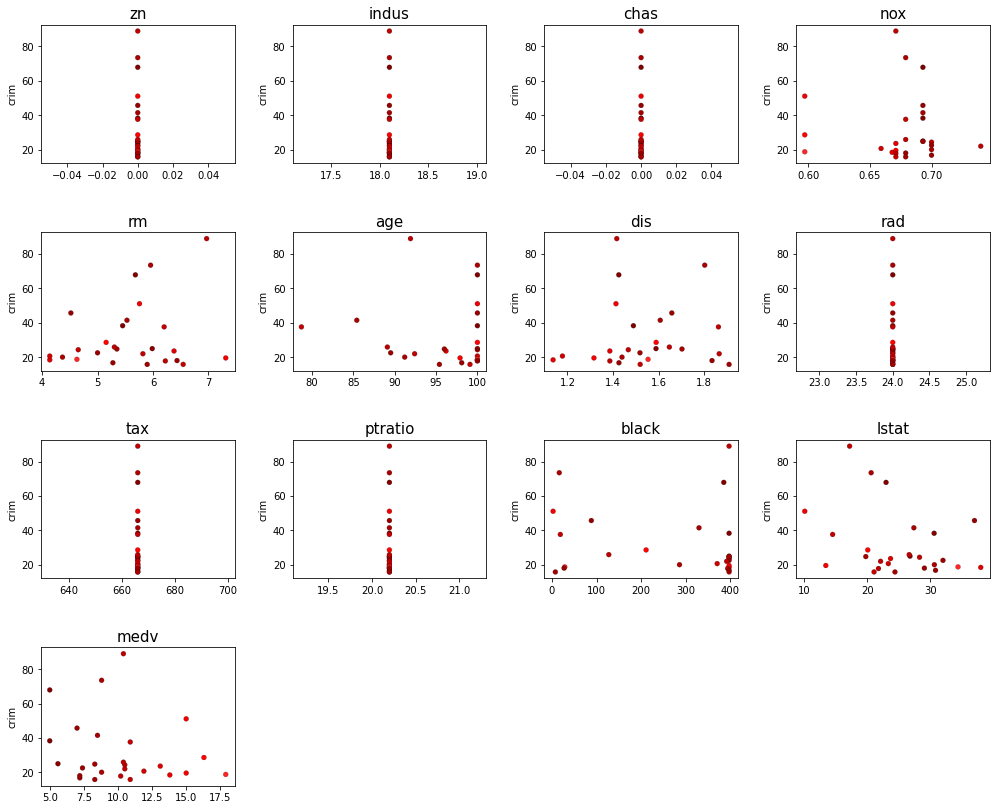

In [70]:
multiplot(hcr, 'crim', 4, huedata=df['medv'])

<div class="alert alert-block alert-info">
<h5>Observations</h5><br>
<a id='obs-hcr'></a>
<b>Features of high crime towns :</b><br>
    n = 26<br>
    • <b>zn</b> = 0 &rarr; no large residential land tracts (> 25000 sq ft)<br>
    • <b>indus</b> = 18.1 &rarr; high proportion of industrial area<br>
    • <b>chas</b> = 0 &rarr; do not have a riverfront<br>
    • <b>nox</b> &rarr; have high concentration of nitrogen oxide<br>
    • <b>age</b> &rarr; high proportion of units built prior to 1940 <br>
    • <b>dis</b> &rarr; nearby to business centers<br>
    • <b>rad</b> = 24 &rarr; closer to radial highways<br>
    • <b>tax</b> = 666 &rarr; high property tax rates<br>
    • <b>ptratio</b> = 20.2 &rarr; high pupil-teacher ratio<br>
    • <b>lstat</b> &rarr; slightly higher concentration than overall<br>
    • <b>medv</b> &rarr; low median house value<br>

*Working notes under point (c)*
</div>

##### Range

In [71]:
hcr_rng = hcr.apply([min,max])
hcr_rng.index = ['hcr_min','hcr_max']
df_rng = df.apply([min,max])
res = pd.concat([hcr_rng, df_rng])
for p in [5,10,25,50,75,90,95]:
    res.loc[f'p{p}'] = df.apply(lambda x: np.percentile(x, p))
res.round(2).T

hcr_min  hcr_max     min     max      p5     p10     p25     p50  \
crim       15.86    88.98    0.01   88.98    0.03    0.04    0.08    0.26   
zn          0.00     0.00    0.00  100.00    0.00    0.00    0.00    0.00   
indus      18.10    18.10    0.46   27.74    2.18    2.91    5.19    9.69   
chas        0.00     0.00    0.00    1.00    0.00    0.00    0.00    0.00   
nox         0.60     0.74    0.38    0.87    0.41    0.43    0.45    0.54   
rm          4.14     7.31    3.56    8.78    5.31    5.59    5.89    6.21   
age        78.70   100.00    2.90  100.00   17.72   26.95   45.02   77.50   
dis         1.14     1.91    1.13   12.13    1.46    1.63    2.10    3.21   
rad        24.00    24.00    1.00   24.00    2.00    3.00    4.00    5.00   
tax       666.00   666.00  187.00  711.00  222.00  233.00  279.00  330.00   
ptratio    20.20    20.20   12.60   22.00   14.70   14.75   17.40   19.05   
black       2.60   396.90    0.32  396.90   84.59  290.27  375.38  391.44   
lstat      10.11    37.97    1.73   37.97    3.71    4.68    6.95   11.36   
medv        5.00    17.90    5.00   50.00   10.20   12.75   17.02   21.20   

            p75     p90     p95  
crim       3.68   10.75   15.79  
zn        12.50   42.50   80.00  
indus     18.10   19.58   21.89  
chas       0.00    0.00    1.00  
nox        0.62    0.71    0.74  
rm         6.62    7.15    7.59  
age       94.07   98.80  100.00  
dis        5.19    6.82    7.83  
rad       24.00   24.00   24.00  
tax      666.00  666.00  666.00  
ptratio   20.20   20.90   21.00  
black    396.22  396.90  396.90  
lstat     16.96   23.04   26.81  
medv      25.00   34.80   43.40

[go to toc](#toc2)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### <i>2) Suburbs with high tax rate</i>

In [72]:
np.percentile(df.tax, [25,50,73,74,75,90,95]).round()

array([279., 330., 597., 666., 666., 666., 666.])

666 is the value at several percentile levels. Lowest being 74 and highest being 99.

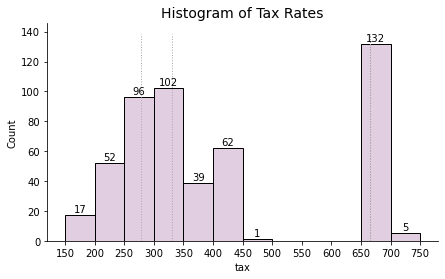

In [73]:
histplot_custom(df.tax, nclass=range(150,800,50), title='Histogram of Tax Rates', 
                labels=True, perc=False, quants=[25,50,75,90,95])

In [74]:
# High tax rate
print(np.percentile(df.tax, 95))
print(round(ptile(df.tax, 666, kind='strict'), 3))
print(round(ptile(df.tax, 666, kind='weak'), 3))

# Towns with High Tax rate
htr = df[df.tax >= np.percentile(df.tax, 95)]
print(htr.shape)
htr.head()

666.0
72.925
99.012
(137, 14)


crim   zn  indus  chas   nox     rm   age     dis   rad    tax  \
356  8.98296  0.0   18.1   1.0  0.77  6.212  97.4  2.1222  24.0  666.0   
357  3.84970  0.0   18.1   1.0  0.77  6.395  91.0  2.5052  24.0  666.0   
358  5.20177  0.0   18.1   1.0  0.77  6.127  83.4  2.7227  24.0  666.0   
359  4.26131  0.0   18.1   0.0  0.77  6.112  81.3  2.5091  24.0  666.0   
360  4.54192  0.0   18.1   0.0  0.77  6.398  88.0  2.5182  24.0  666.0   

     ptratio   black  lstat  medv  
356     20.2  377.73  17.60  17.8  
357     20.2  391.34  13.27  21.7  
358     20.2  395.43  11.48  22.7  
359     20.2  390.74  12.67  22.6  
360     20.2  374.56   7.79  25.0

##### Scatterplot

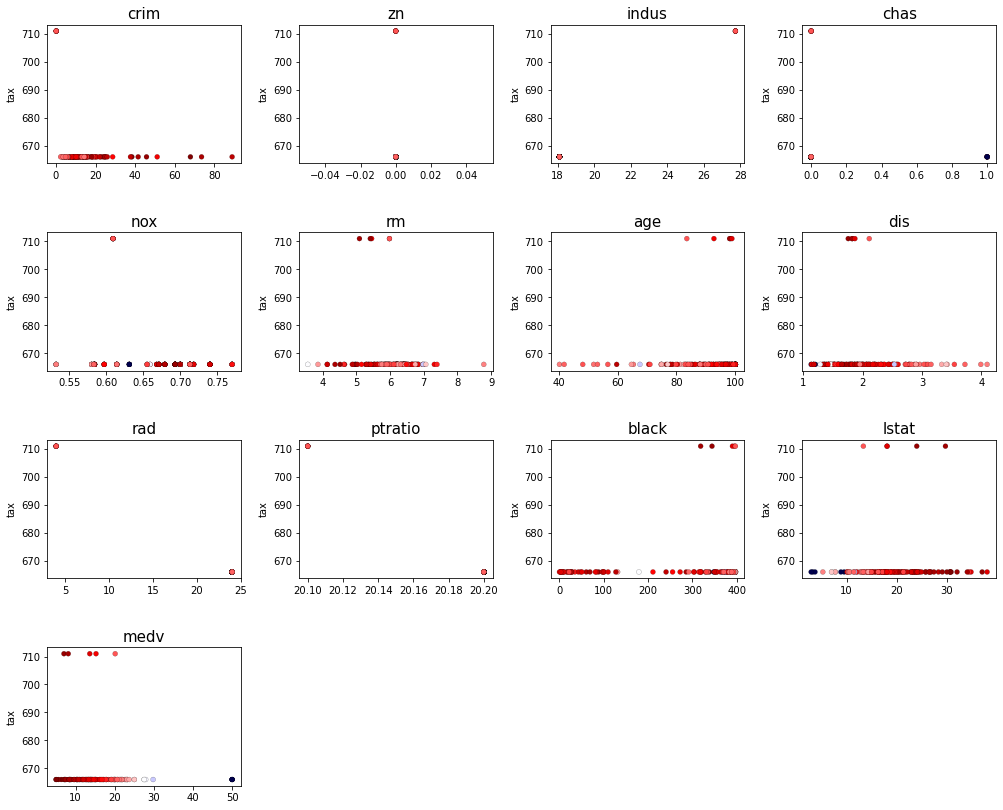

In [75]:
multiplot(htr, 'tax', 4, huedata=df['medv'])

<div class="alert alert-block alert-info">
<h5>Observations</h5><br>
<a id='obs-htr'></a>
<b>Features of high tax-rate towns :</b><br>
    n = 137<br>
    • <b>crim</b> &rarr; high crim<br>
    • <b>zn</b> = 0 &rarr; no large residential land tracts (> 25000 sq ft)<br>
    • <b>indus</b> = 18.1, 27.74 &rarr; high proportion of industrial area<br>
    • <b>nox</b> &rarr; amongst the towns with high concentration of nitrogen oxide<br>
    • <b>age</b> &rarr; high proportion of units built prior to 1940 <br>
    • <b>dis</b> &rarr; nearby to business centers<br>
    • <b>rad</b> = 24 &rarr; closer to radial highways<br>
    • <b>ptratio</b> = 20.2, 20.1 &rarr; high pupil-teacher ratio<br>
    • <b>lstat</b> &rarr; slightly higher concentration than overall<br>
    • <b>medv</b> &rarr; low median house value<br>

*Working notes below*
</div>

##### Range

In [76]:
htr_rng = htr.apply([min,max])
htr_rng.index = ['htr_min','htr_max']
df_rng = df.apply([min,max])
res = pd.concat([htr_rng, df_rng])
for p in [5,10,25,50,75,90,95]:
    res.loc[f'p{p}'] = df.apply(lambda x: np.percentile(x, p))
res.round(2).T

htr_min  htr_max     min     max      p5     p10     p25     p50  \
crim        0.11    88.98    0.01   88.98    0.03    0.04    0.08    0.26   
zn          0.00     0.00    0.00  100.00    0.00    0.00    0.00    0.00   
indus      18.10    27.74    0.46   27.74    2.18    2.91    5.19    9.69   
chas        0.00     1.00    0.00    1.00    0.00    0.00    0.00    0.00   
nox         0.53     0.77    0.38    0.87    0.41    0.43    0.45    0.54   
rm          3.56     8.78    3.56    8.78    5.31    5.59    5.89    6.21   
age        40.30   100.00    2.90  100.00   17.72   26.95   45.02   77.50   
dis         1.13     4.10    1.13   12.13    1.46    1.63    2.10    3.21   
rad         4.00    24.00    1.00   24.00    2.00    3.00    4.00    5.00   
tax       666.00   711.00  187.00  711.00  222.00  233.00  279.00  330.00   
ptratio    20.10    20.20   12.60   22.00   14.70   14.75   17.40   19.05   
black       0.32   396.90    0.32  396.90   84.59  290.27  375.38  391.44   
lstat       2.96    37.97    1.73   37.97    3.71    4.68    6.95   11.36   
medv        5.00    50.00    5.00   50.00   10.20   12.75   17.02   21.20   

            p75     p90     p95  
crim       3.68   10.75   15.79  
zn        12.50   42.50   80.00  
indus     18.10   19.58   21.89  
chas       0.00    0.00    1.00  
nox        0.62    0.71    0.74  
rm         6.62    7.15    7.59  
age       94.07   98.80  100.00  
dis        5.19    6.82    7.83  
rad       24.00   24.00   24.00  
tax      666.00  666.00  666.00  
ptratio   20.20   20.90   21.00  
black    396.22  396.90  396.90  
lstat     16.96   23.04   26.81  
medv      25.00   34.80   43.40

[go to toc](#toc)

##### --&nbsp; Workings &nbsp; --------------------------------------------------------------

###### crim

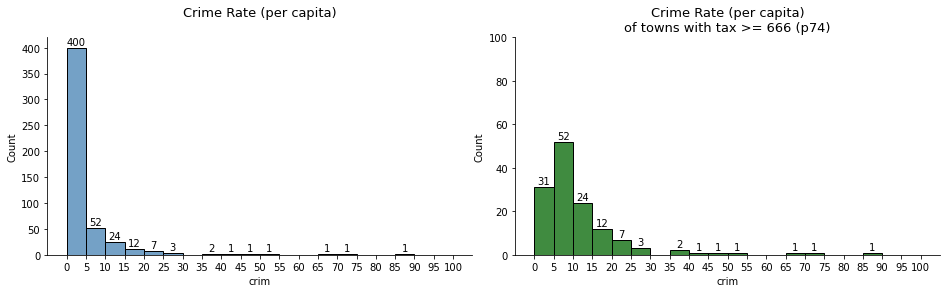

In [77]:
multihist(df, htr, 'crim', nclass=np.arange(0,105,5), yrange2=(0,100), 
          axis=True, 
          title='Crime Rate (per capita)', subtitle='of towns with tax >= 666 (p74)')

All the towns with crim > 5 have tax >= 666.

###### zn

In [78]:
var_prop(df, htr, 'zn', [0])

count_df1  prop_df1  count_df2  prop_df2  ratio
0      372.0     0.735      137.0       1.0  1.361

###### indus

In [79]:
var_prop(df, htr, 'indus', [18.1, 27.74])

count_df1  prop_df1  count_df2  prop_df2  ratio
18.1       132.0     0.261      132.0     0.964  3.693
27.74        5.0     0.010        5.0     0.036  3.600
total      137.0     0.271      137.0     1.000  3.690

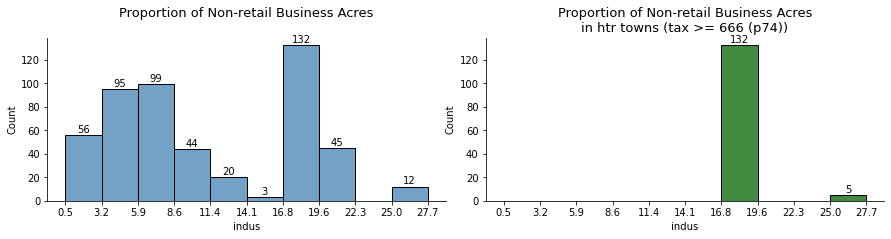

In [80]:
multihist(df, htr, 'indus', axis=True, roff=1, axis_jump=1, plot_dim=(15,3),
          title='Proportion of Non-retail Business Acres', subtitle='in htr towns (tax >= 666 (p74))')

###### chas

In [81]:
var_prop(df, htr, 'chas', [0,1])

count_df1  prop_df1  count_df2  prop_df2  ratio
0          471.0     0.931      129.0     0.942  1.012
1           35.0     0.069        8.0     0.058  0.841
total      506.0     1.000      137.0     1.000  1.000

###### nox

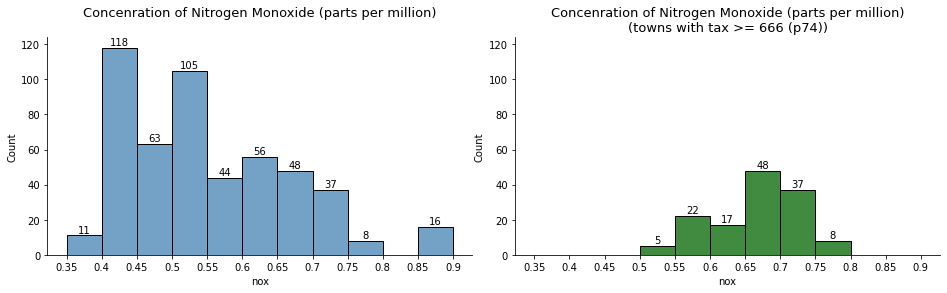

In [82]:
multihist(df, htr, 'nox', nclass=np.arange(.3501,.9501,.05), axis=True, roff=3, axis_jump=1,
          title='Concenration of Nitrogen Monoxide (parts per million)', 
          subtitle='(towns with tax >= 666 (p74))')

###### rm

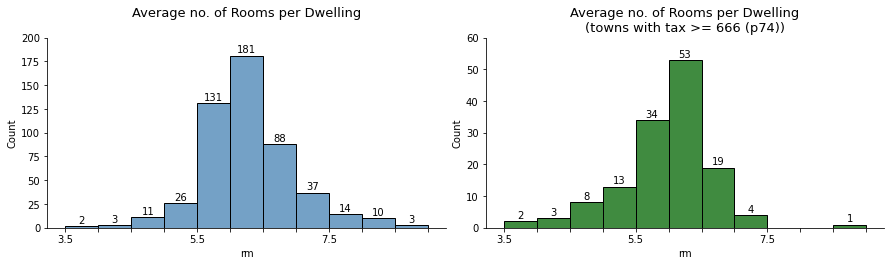

In [83]:
multihist(df, htr, 'rm', nclass=np.arange(3.501,9.501,.5), plot_dim=(15,3.5),
          yrange1=(0,200), yrange2=(0,60), axis=True, roff=2, axis_jump=4,
          title='Average no. of Rooms per Dwelling', subtitle='(towns with tax >= 666 (p74))')

###### age

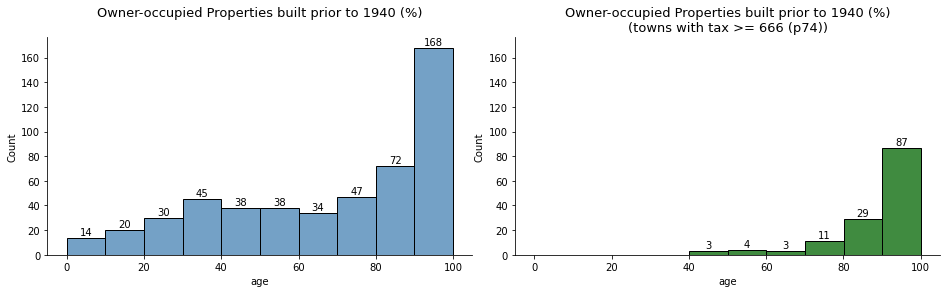

In [84]:
multihist(df, htr, 'age',  nclass=np.arange(0.001,105.001,10),
          title='Owner-occupied Properties built prior to 1940 (%)', 
          subtitle='(towns with tax >= 666 (p74))')

###### dis

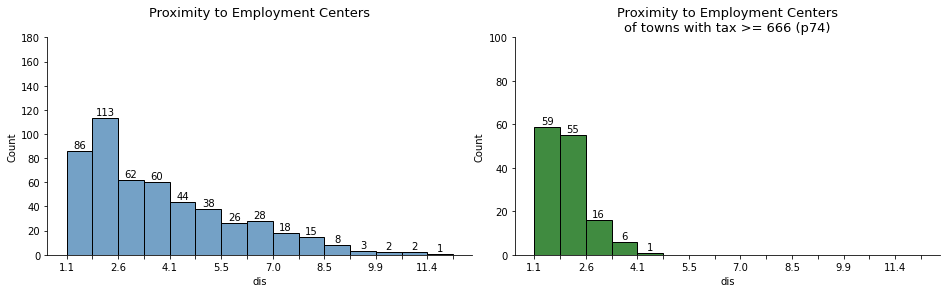

In [85]:
multihist(df, htr, 'dis', axis=True, axis_jump=2, yrange1=(0,180), yrange2=(0,100),
          title='Proximity to Employment Centers', subtitle='of towns with tax >= 666 (p74)')

###### rad

In [86]:
var_prop(df, htr, 'rad', [4,24])

count_df1  prop_df1  count_df2  prop_df2  ratio
4          110.0     0.217        5.0     0.036  0.166
24         132.0     0.261      132.0     0.964  3.693
total      242.0     0.478      137.0     1.000  2.092

###### ptratio

In [87]:
var_prop(df, htr, 'ptratio', [20.1,20.2])

count_df1  prop_df1  count_df2  prop_df2  ratio
20.1         5.0     0.010        5.0     0.036  3.600
20.2       140.0     0.277      132.0     0.964  3.480
total      145.0     0.287      137.0     1.000  3.484

###### black

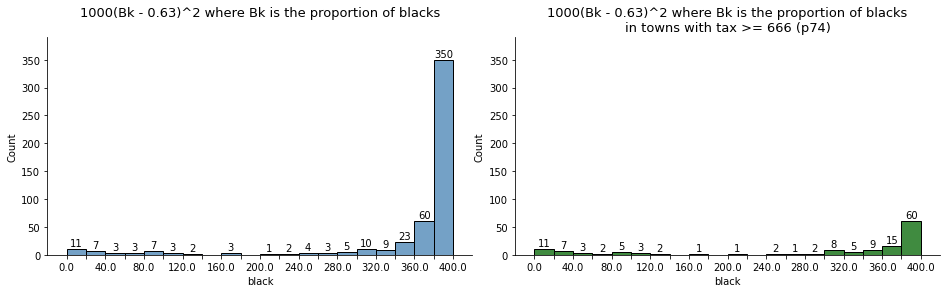

In [88]:
multihist(df, htr, 'black', nclass=np.arange(0.001,420.001,20),
          axis=True, yrange1=(0,390), yrange2=(0,390), axis_jump=2,
          title='1000(Bk - 0.63)^2 where Bk is the proportion of blacks', 
          subtitle='in towns with tax >= 666 (p74)', perc=False)

###### lstat

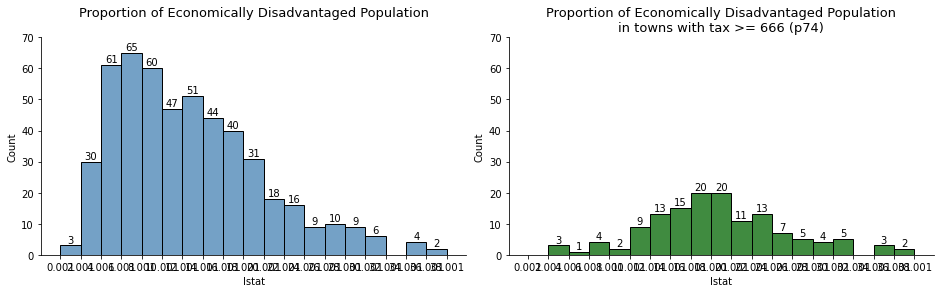

In [89]:
multihist(df, htr, 'lstat', nclass=np.arange(0.001,40.001,2),
          axis=True, yrange1=(0,70), yrange2=(0,70),
          title='Proportion of Economically Disadvantaged Population', 
          subtitle='in towns with tax >= 666 (p74)')

###### medv

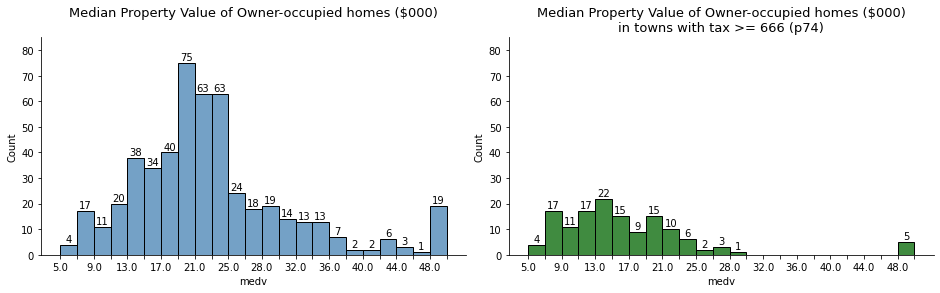

In [90]:
multihist(df, htr, 'medv', nclass='fd', yrange1=(0,85), yrange2=(0,85), 
          axis=True, axis_jump=2, roff=0,
          title="Median Property Value of Owner-occupied homes ($000)", 
          subtitle='in towns with tax >= 666 (p74)')

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### <i>3) Suburbs with high pupil-teacher ratio</i>

In [91]:
np.percentile(df.ptratio, [25,50,75,90,95])

array([17.4 , 19.05, 20.2 , 20.9 , 21.  ])

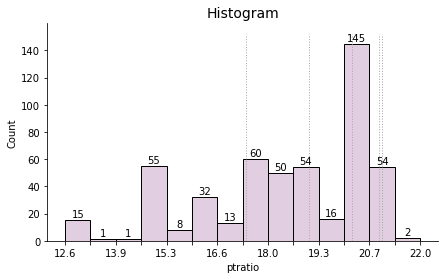

In [92]:
# Distribution
histplot_custom(df.ptratio, nclass='fd', labels=True, axis=True, axis_jump=2, quants=[25,50,75,90,95])

In [93]:
# High ptratio
print(np.percentile(df.ptratio, 95))
print(ptile(df.ptratio, 21))

# Towns with High pupil-teacher ratio
hptr = df[df.ptratio >= 21]
print(hptr.shape)
hptr.head()

21.0
93.87351778656127
(45, 14)


crim   zn  indus  chas    nox     rm   age     dis  rad    tax  \
13  0.62976  0.0   8.14   0.0  0.538  5.949  61.8  4.7075  4.0  307.0   
14  0.63796  0.0   8.14   0.0  0.538  6.096  84.5  4.4619  4.0  307.0   
15  0.62739  0.0   8.14   0.0  0.538  5.834  56.5  4.4986  4.0  307.0   
16  1.05393  0.0   8.14   0.0  0.538  5.935  29.3  4.4986  4.0  307.0   
17  0.78420  0.0   8.14   0.0  0.538  5.990  81.7  4.2579  4.0  307.0   

    ptratio   black  lstat  medv  
13     21.0  396.90   8.26  20.4  
14     21.0  380.02  10.26  18.2  
15     21.0  395.62   8.47  19.9  
16     21.0  386.85   6.58  23.1  
17     21.0  386.75  14.67  17.5

##### Scatterplot

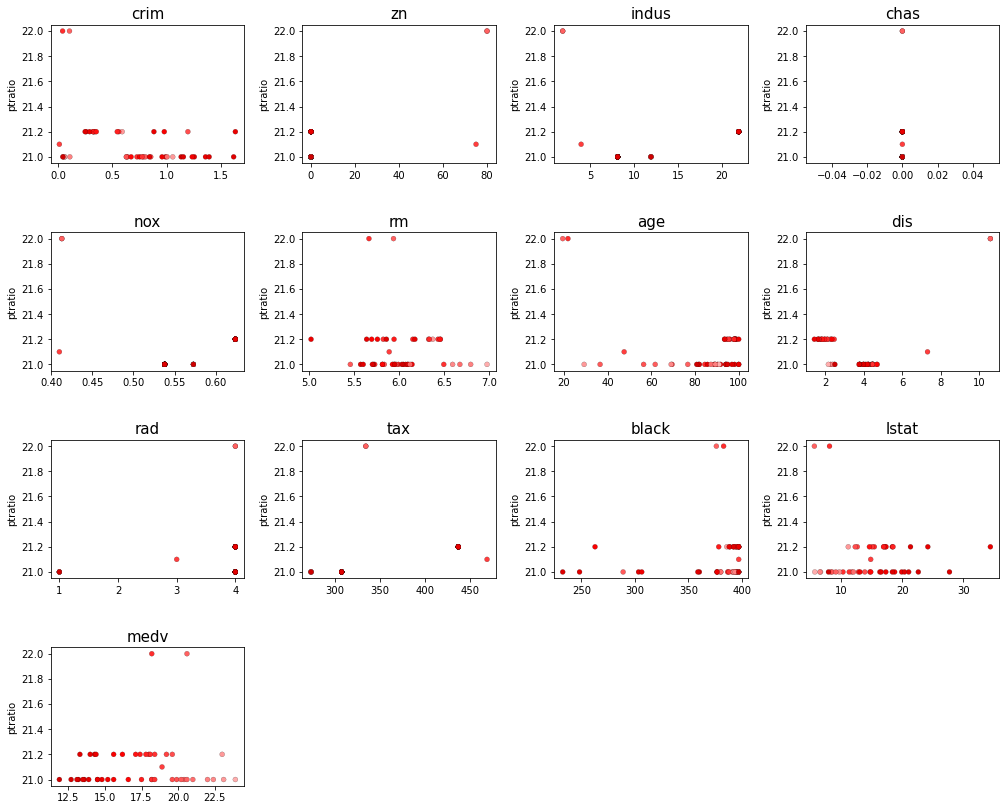

In [94]:
multiplot(hptr, 'ptratio', 4, huedata=df['medv'])

<a id='obs-hptr'></a>
<div class="alert alert-block alert-info">
<h5>Observations</h5><br>
<b>Features of towns with extremely high pupil-teacher ratio (ptratio >= 21 (p95)):</b><br>
    n = 45<br>
    • <b>crim</b> &rarr; low crim (0-5)<br>
    • <b>zn</b> &rarr; mostly zn=0 i.e no large residential land tracts (> 25000 sq ft), but there are 3 towns with very high proportion (75,80) of large tracts<br>
    • <b>chas</b> &rarr; none of the towns has Charles River running through it<br>
    • <b>age</b> &rarr; most towns have high proportion of units built prior to 1940 <br>
    • <b>dis</b> &rarr; distance from business centers ranges from 1 to 5 in almost all cases<br>
    • <b>rad</b> &rarr; the towns rank low on the accessibility index<br>
    • <b>tax</b> &rarr; medium property tax rate levels<br>
    • <b>medv</b> &rarr; medium levels of median house value<br>

*Working notes below*
</div>

##### Range

In [95]:
hptr_rng = hptr.apply([min,max])
hptr_rng.index = ['hptr_min','hptr_max']
df_rng = df.apply([min,max])
res = pd.concat([hptr_rng, df_rng])
for p in [5,10,25,50,75,90,95]:
    res.loc[f'p{p}'] = df.apply(lambda x: np.percentile(x, p))
res.round(2).T

hptr_min  hptr_max     min     max      p5     p10     p25     p50  \
crim         0.01      1.63    0.01   88.98    0.03    0.04    0.08    0.26   
zn           0.00     80.00    0.00  100.00    0.00    0.00    0.00    0.00   
indus        1.91     21.89    0.46   27.74    2.18    2.91    5.19    9.69   
chas         0.00      0.00    0.00    1.00    0.00    0.00    0.00    0.00   
nox          0.41      0.62    0.38    0.87    0.41    0.43    0.45    0.54   
rm           5.02      6.98    3.56    8.78    5.31    5.59    5.89    6.21   
age         19.50    100.00    2.90  100.00   17.72   26.95   45.02   77.50   
dis          1.44     10.59    1.13   12.13    1.46    1.63    2.10    3.21   
rad          1.00      4.00    1.00   24.00    2.00    3.00    4.00    5.00   
tax        273.00    469.00  187.00  711.00  222.00  233.00  279.00  330.00   
ptratio     21.00     22.00   12.60   22.00   14.70   14.75   17.40   19.05   
black      232.60    396.90    0.32  396.90   84.59  290.27  375.38  391.44   
lstat        5.57     34.41    1.73   37.97    3.71    4.68    6.95   11.36   
medv        11.90     23.90    5.00   50.00   10.20   12.75   17.02   21.20   

            p75     p90     p95  
crim       3.68   10.75   15.79  
zn        12.50   42.50   80.00  
indus     18.10   19.58   21.89  
chas       0.00    0.00    1.00  
nox        0.62    0.71    0.74  
rm         6.62    7.15    7.59  
age       94.07   98.80  100.00  
dis        5.19    6.82    7.83  
rad       24.00   24.00   24.00  
tax      666.00  666.00  666.00  
ptratio   20.20   20.90   21.00  
black    396.22  396.90  396.90  
lstat     16.96   23.04   26.81  
medv      25.00   34.80   43.40

[go to toc](#toc)

##### --&nbsp; Workings &nbsp; --------------------------------------------------------------

###### crim

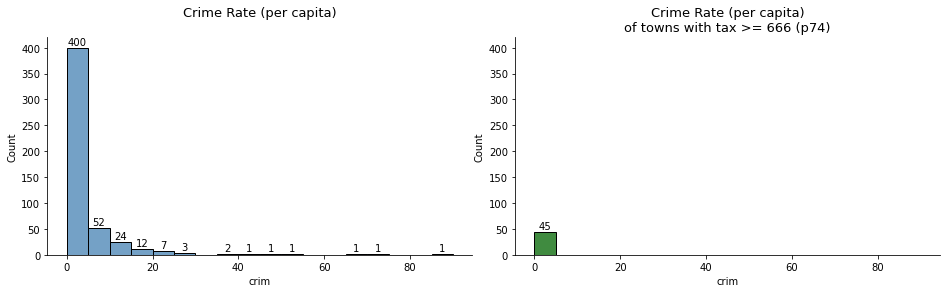

In [96]:
multihist(df, hptr, 'crim', nclass=np.arange(0.001,95.001,5),
          title='Crime Rate (per capita)', subtitle='of towns with tax >= 666 (p74)')

###### zn

In [97]:
var_prop(df, hptr, 'zn', [0,75,80])

count_df1  prop_df1  count_df2  prop_df2  ratio
0          372.0     0.735       42.0     0.933  1.269
75           3.0     0.006        1.0     0.022  3.667
80          15.0     0.030        2.0     0.044  1.467
total      390.0     0.771       45.0     0.999  1.296

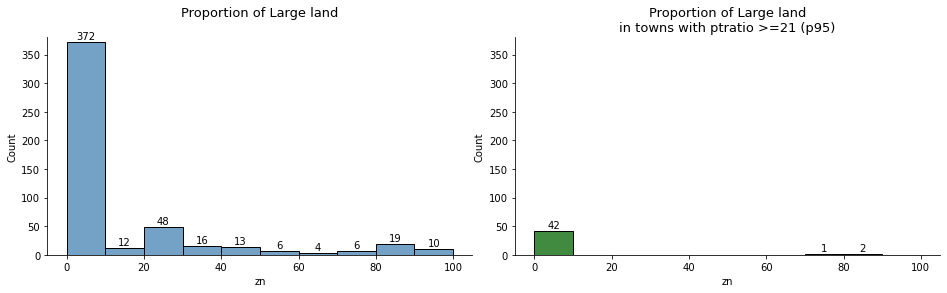

In [98]:
multihist(df, hptr, 'zn', nclass=range(0,110,10), yrange1=(0,380), yrange2=(0,380), 
          title='Proportion of Large land', subtitle='in towns with ptratio >=21 (p95)')

###### indus

In [99]:
var_prop(df, hptr, 'indus', [18.1, 27.74])

count_df1  prop_df1  count_df2  prop_df2  ratio
18.1       132.0     0.261        0.0       0.0    0.0
27.74        5.0     0.010        0.0       0.0    0.0
total      137.0     0.271        0.0       0.0    0.0

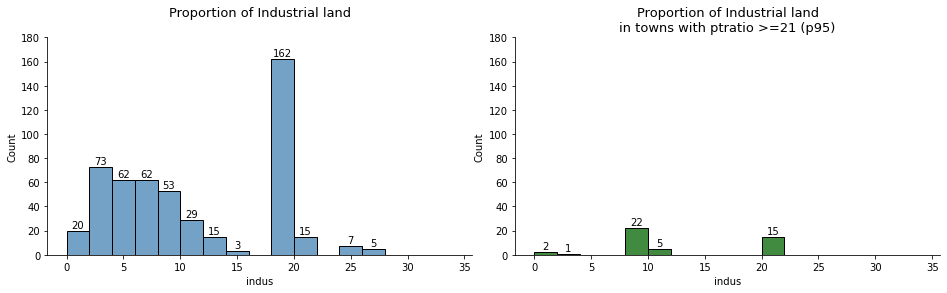

In [100]:
multihist(df, hptr, 'indus', nclass=np.arange(0.001,35,2), yrange1=(0,180), yrange2=(0,180), 
          title='Proportion of Industrial land', subtitle='in towns with ptratio >=21 (p95)')

###### chas

In [101]:
var_prop(df, hptr, 'chas', [0,1])

count_df1  prop_df1  count_df2  prop_df2  ratio
0          471.0     0.931       45.0       1.0  1.074
1           35.0     0.069        0.0       0.0  0.000
total      506.0     1.000       45.0       1.0  1.000

###### nox

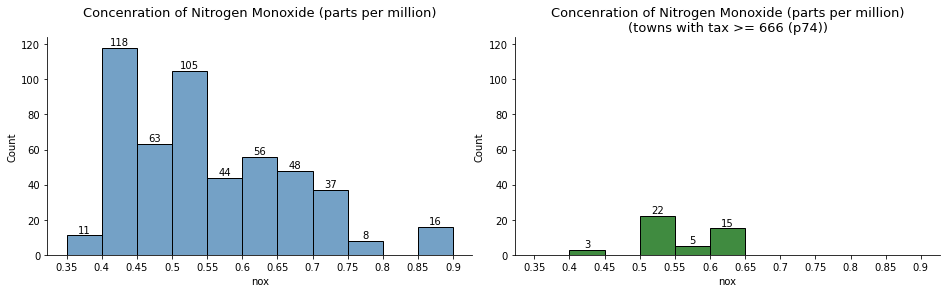

In [102]:
multihist(df, hptr, 'nox', nclass=np.arange(.3501,.9501,.05), axis=True, roff=3, axis_jump=1,
          title='Concenration of Nitrogen Monoxide (parts per million)', 
          subtitle='(towns with tax >= 666 (p74))')

###### rm

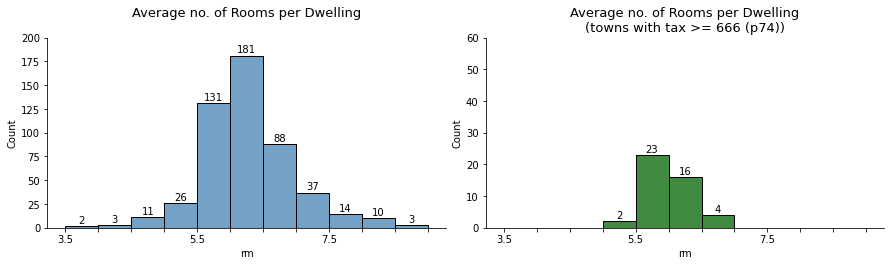

In [103]:
multihist(df, hptr, 'rm', nclass=np.arange(3.501,9.501,.5), plot_dim=(15,3.5),
          yrange1=(0,200), yrange2=(0,60), axis=True, roff=2, axis_jump=4,
          title='Average no. of Rooms per Dwelling', subtitle='(towns with tax >= 666 (p74))')

###### age

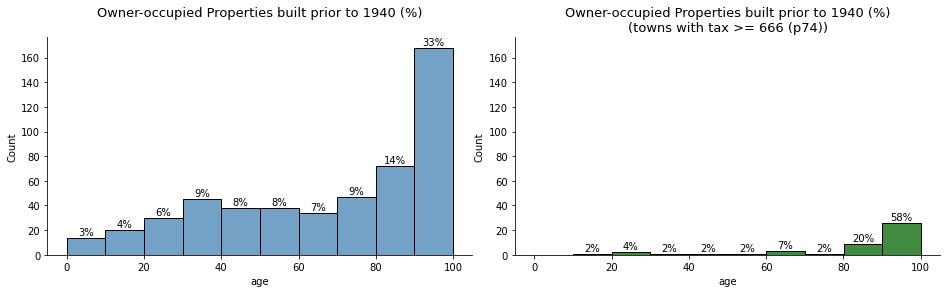

In [104]:
multihist(df, hptr, 'age',  nclass=np.arange(0.001,105.001,10), perc=True,
          title='Owner-occupied Properties built prior to 1940 (%)', 
          subtitle='(towns with tax >= 666 (p74))')

###### dis

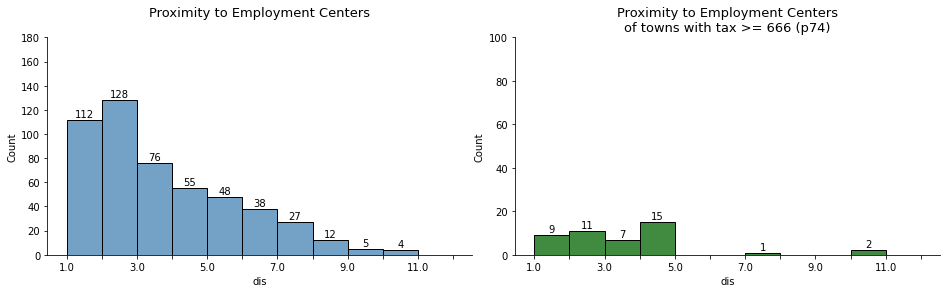

In [105]:
multihist(df, hptr, 'dis', nclass=np.arange(1.001, 13.001, 1),
          axis=True, axis_jump=2, yrange1=(0,180), yrange2=(0,100),
          title='Proximity to Employment Centers', subtitle='of towns with tax >= 666 (p74)')

###### rad

In [106]:
var_prop(df, hptr, 'rad', sorted(hptr.rad.unique()))

count_df1  prop_df1  count_df2  prop_df2  ratio
1.0         20.0     0.040        5.0     0.111  2.775
3.0         38.0     0.075        1.0     0.022  0.293
4.0        110.0     0.217       39.0     0.867  3.995
total      168.0     0.332       45.0     1.000  3.012

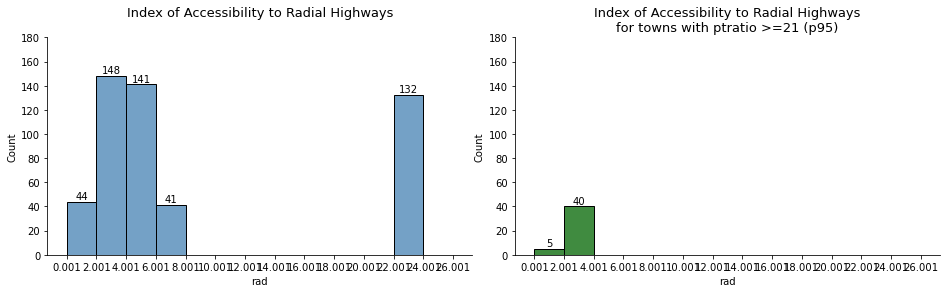

In [107]:
multihist(df, hptr, 'rad', nclass=np.arange(0.001, 28.001, 2),
          axis=True, yrange1=(0,180), yrange2=(0,180),
          title='Index of Accessibility to Radial Highways', 
          subtitle='for towns with ptratio >=21 (p95)')

###### tax

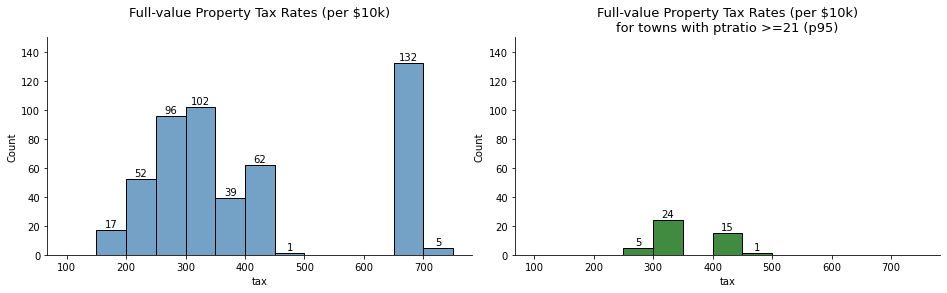

In [108]:
multihist(df, hptr, 'tax', nclass=np.arange(100,800,50), yrange1=(0,150), yrange2=(0,150), 
          title='Full-value Property Tax Rates (per $10k)', 
          subtitle='for towns with ptratio >=21 (p95)')

###### black

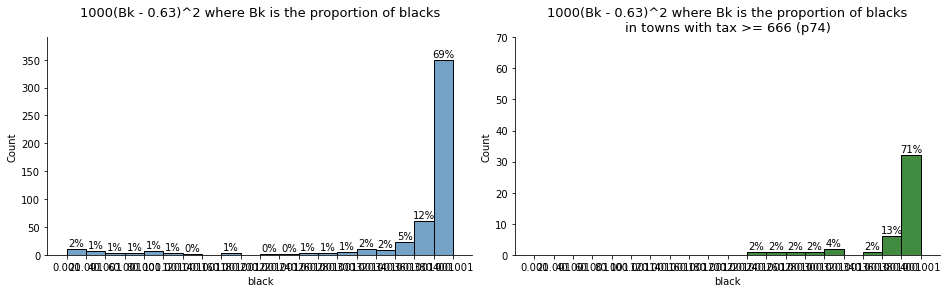

In [109]:
multihist(df, hptr, 'black', nclass=np.arange(0.001,420.001,20),
          axis=True, yrange1=(0,390), yrange2=(0,70),
          title='1000(Bk - 0.63)^2 where Bk is the proportion of blacks', 
          subtitle='in towns with tax >= 666 (p74)', perc=True)

###### lstat

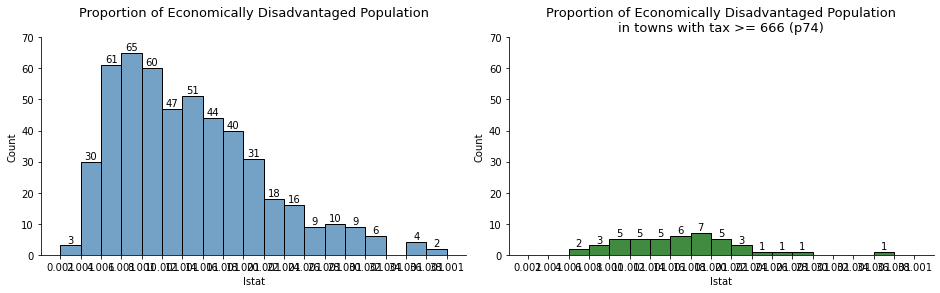

In [110]:
multihist(df, hptr, 'lstat', nclass=np.arange(0.001,40.001,2),
          axis=True, yrange1=(0,70), yrange2=(0,70),
          title='Proportion of Economically Disadvantaged Population', 
          subtitle='in towns with tax >= 666 (p74)')

###### medv

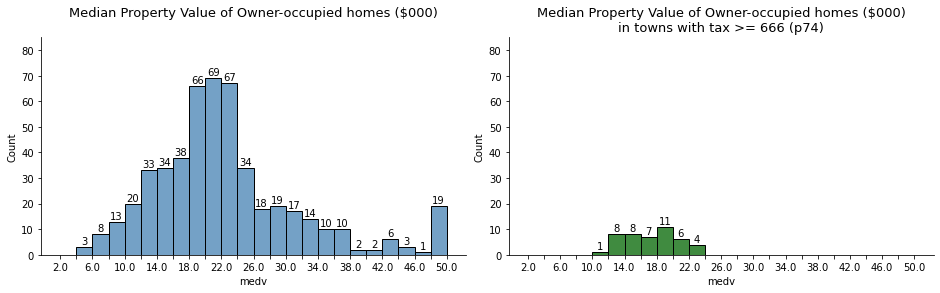

In [111]:
multihist(df, hptr, 'medv', nclass=np.arange(2.001,52.001,2), yrange1=(0,85), yrange2=(0,85), 
          axis=True, axis_jump=2, roff=0,
          title="Median Property Value of Owner-occupied homes ($000)", 
          subtitle='in towns with tax >= 666 (p74)')

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### e) Suburbs bounding Charles River
How many of the suburbs in this data set bound the Charles river?

In [112]:
df.chas[df.chas==1].count()

35

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### f) Median pupil-teacher ratio
What is the median pupil-teacher ratio among the towns in this data set?

In [113]:
np.median(df.ptratio)
# or
df.ptratio.median()

19.05

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### g) Lowest medv Suburb
Which suburb of Boston has lowest median value of owner-occupied homes? 
What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? 
Comment on your findings.

In [114]:
# Suburb(s) with lowest median home value
low_medv = df[df.medv == min(df.medv)]
low_medv

crim   zn  indus  chas    nox     rm    age     dis   rad    tax  \
398  38.3518  0.0   18.1   0.0  0.693  5.453  100.0  1.4896  24.0  666.0   
405  67.9208  0.0   18.1   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   

     ptratio   black  lstat  medv  
398     20.2  396.90  30.59   5.0  
405     20.2  384.97  22.98   5.0

In [115]:
perc = pd.DataFrame()
for c in low_medv.columns:
    for i in low_medv.index:
        perc.loc[i,c] = round(ptile(df[c], low_medv.loc[i,c], kind='weak')/100,3)

perc.index = [str(i)+'_p' for i in perc.index]

# Values and ranks
low_medv = pd.concat([low_medv,perc], axis=0)
low_medv = low_medv.reindex(index=[398,'398_p',405,'405_p'])
low_medv

crim     zn   indus   chas    nox     rm    age     dis   rad  \
398    38.3518  0.000  18.100  0.000  0.693  5.453  100.0  1.4896  24.0   
398_p   0.9880  0.735   0.887  0.931  0.858  0.077    1.0  0.0570   1.0   
405    67.9208  0.000  18.100  0.000  0.693  5.683  100.0  1.4254  24.0   
405_p   0.9960  0.735   0.887  0.931  0.858  0.136    1.0  0.0420   1.0   

          tax  ptratio   black   lstat   medv  
398    666.00   20.200  396.90  30.590  5.000  
398_p    0.99    0.889    1.00   0.978  0.004  
405    666.00   20.200  384.97  22.980  5.000  
405_p    0.99    0.889    0.35   0.899  0.004

In [116]:
# Summary of full dataset
mean = df.apply(lambda x: round(np.mean(x),3))
summ = df.apply(lambda x: np.percentile(x, [5,10,25,50,75,90,95,99])).round(3)
summ = pd.concat([mean.to_frame().T, summ], axis=0)
summ.index = ['mean']+[str(i)+'%' for i in [5,10,25,50,75,90,95,99]]

# Table
pd.concat([low_medv, summ], axis=0).T.round(3)

398  398_p      405  405_p     mean       5%      10%      25%  \
crim      38.352  0.988   67.921  0.996    3.614    0.028    0.038    0.082   
zn         0.000  0.735    0.000  0.735   11.364    0.000    0.000    0.000   
indus     18.100  0.887   18.100  0.887   11.137    2.180    2.910    5.190   
chas       0.000  0.931    0.000  0.931    0.069    0.000    0.000    0.000   
nox        0.693  0.858    0.693  0.858    0.555    0.409    0.427    0.449   
rm         5.453  0.077    5.683  0.136    6.285    5.314    5.594    5.886   
age      100.000  1.000  100.000  1.000   68.575   17.725   26.950   45.025   
dis        1.490  0.057    1.425  0.042    3.795    1.462    1.628    2.100   
rad       24.000  1.000   24.000  1.000    9.549    2.000    3.000    4.000   
tax      666.000  0.990  666.000  0.990  408.237  222.000  233.000  279.000   
ptratio   20.200  0.889   20.200  0.889   18.456   14.700   14.750   17.400   
black    396.900  1.000  384.970  0.350  356.674   84.590  290.270  375.378   
lstat     30.590  0.978   22.980  0.899   12.653    3.708    4.680    6.950   
medv       5.000  0.004    5.000  0.004   22.533   10.200   12.750   17.025   

             50%      75%      90%      95%      99%  
crim       0.257    3.677   10.753   15.789   41.370  
zn         0.000   12.500   42.500   80.000   90.000  
indus      9.690   18.100   19.580   21.890   25.650  
chas       0.000    0.000    0.000    1.000    1.000  
nox        0.538    0.624    0.713    0.740    0.871  
rm         6.208    6.624    7.152    7.588    8.335  
age       77.500   94.075   98.800  100.000  100.000  
dis        3.207    5.188    6.817    7.828    9.223  
rad        5.000   24.000   24.000   24.000   24.000  
tax      330.000  666.000  666.000  666.000  666.000  
ptratio   19.050   20.200   20.900   21.000   21.200  
black    391.440  396.225  396.900  396.900  396.900  
lstat     11.360   16.955   23.035   26.808   33.918  
medv      21.200   25.000   34.800   43.400   50.000

<a id='obs-medv'></a>
<div class="alert alert-block alert-info">
<h5>Observations</h5>

The towns with lowest median owner-occupied house values have the following features:<br>
    • <b>crim</b> &rarr; amongst the highest crime rates, nearly p99<br>
    • <b>zn</b> &rarr; zn below p75<br>
    • <b>indus</b> &rarr; high indus, about p75<br>
    • <b>chas</b> &rarr; not bounded by Charles River, just like 90% of the towns<br>
    • <b>nox</b> &rarr; above p75<br>
    • <b>rm</b> &rarr; low rm, below p15<br>
    • <b>age</b> &rarr; above p95<br>
    • <b>dis</b> &rarr; very low dis, below p6<br>
    • <b>rad</b> &rarr; highest rad index<br>
    • <b>tax</b> &rarr; highest tax bracket<br>
    • <b>ptratio</b> &rarr; high, above p88<br>
    • <b>black</b> &rarr; one town has high, other has low<br>
    • <b>lstat</b> &rarr; above p89<br>

*Summarily*:<br>
    • <b>90th percentile or more</b> &rarr; crim, age, rad, tax, lstat (approx.)<br>
    • <b>75th - 90th percentile</b> &rarr; indus, nox, ptratio<br>
    • <b>15th percentile or less</b> &rarr; zn, chas, rm, dis<br>
    
*percentile rank is denoted by 'pXX'*
</div>

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### h) Suburbs with high average no. of rooms
In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?  
Comment on the suburbs that average more than eight rooms per dwelling.

In [117]:
# Above 7 rooms per dwelling on an average
df.rm[df.rm > 7].count()

64

In [118]:
# Above 8 rooms per dwelling on an average
hrmt = df[df.rm > 8]
len(hrmt)

13

In [119]:
# Percentile table - hrmt
summ_hrmt = hrmt.describe(percentiles=[.05,.10,.25,.50,.75,.90,.95]).round(3)
summ_hrmt.drop(['count','std'],axis=0,inplace=True)
summ_hrmt = summ_hrmt.reindex(index=['min','5%','10%','25%','50%','mean','75%','90%','95%','max'])
summ_hrmt

crim      zn   indus   chas    nox     rm     age    dis     rad  \
min   0.020   0.000   2.680  0.000  0.416  8.034   8.400  1.801   2.000   
5%    0.081   0.000   2.806  0.000  0.425  8.038  22.500  1.863   3.200   
10%   0.160   0.000   3.106  0.000  0.434  8.046  38.920  1.956   4.200   
25%   0.331   0.000   3.970  0.000  0.504  8.247  70.400  2.288   5.000   
50%   0.520   0.000   6.200  0.000  0.507  8.297  78.300  2.894   7.000   
mean  0.719  13.615   7.078  0.154  0.539  8.349  71.538  3.430   7.462   
75%   0.578  20.000   6.200  0.000  0.605  8.398  86.500  3.652   8.000   
90%   1.338  21.600  15.720  0.800  0.647  8.721  90.580  4.862   8.000   
95%   2.301  51.200  18.692  1.000  0.675  8.747  92.460  6.633  14.400   
max   3.474  95.000  19.580  1.000  0.718  8.780  93.900  8.907  24.000   

          tax  ptratio    black  lstat   medv  
min   224.000   13.000  354.550  2.470  21.90  
5%    248.000   13.000  369.190  2.716  31.32  
10%   264.000   13.000  379.560  2.930  37.82  
25%   264.000   14.700  384.540  3.320  41.70  
50%   307.000   17.400  386.860  4.140  48.30  
mean  325.077   16.362  385.211  4.310  44.20  
75%   307.000   17.400  389.700  5.120  50.00  
90%   388.400   18.880  395.630  5.786  50.00  
95%   508.200   19.540  396.900  6.522  50.00  
max   666.000   20.200  396.900  7.440  50.00

In [120]:
# Percentile table - overall
summ_df = df.describe(percentiles=[.05,.10,.25,.50,.75,.90,.95]).round(3)
summ_df.drop(['count','std'],axis=0,inplace=True)
summ_df = summ_df.reindex(index=['min','5%','10%','25%','50%','mean','75%','90%','95%','max'])
summ_df

crim       zn   indus   chas    nox     rm      age     dis     rad  \
min    0.006    0.000   0.460  0.000  0.385  3.561    2.900   1.130   1.000   
5%     0.028    0.000   2.180  0.000  0.409  5.314   17.725   1.462   2.000   
10%    0.038    0.000   2.910  0.000  0.427  5.594   26.950   1.628   3.000   
25%    0.082    0.000   5.190  0.000  0.449  5.886   45.025   2.100   4.000   
50%    0.257    0.000   9.690  0.000  0.538  6.208   77.500   3.207   5.000   
mean   3.614   11.364  11.137  0.069  0.555  6.285   68.575   3.795   9.549   
75%    3.677   12.500  18.100  0.000  0.624  6.624   94.075   5.188  24.000   
90%   10.753   42.500  19.580  0.000  0.713  7.152   98.800   6.817  24.000   
95%   15.789   80.000  21.890  1.000  0.740  7.588  100.000   7.828  24.000   
max   88.976  100.000  27.740  1.000  0.871  8.780  100.000  12.126  24.000   

          tax  ptratio    black   lstat    medv  
min   187.000   12.600    0.320   1.730   5.000  
5%    222.000   14.700   84.590   3.708  10.200  
10%   233.000   14.750  290.270   4.680  12.750  
25%   279.000   17.400  375.378   6.950  17.025  
50%   330.000   19.050  391.440  11.360  21.200  
mean  408.237   18.456  356.674  12.653  22.533  
75%   666.000   20.200  396.225  16.955  25.000  
90%   666.000   20.900  396.900  23.035  34.800  
95%   666.000   21.000  396.900  26.808  43.400  
max   711.000   22.000  396.900  37.970  50.000

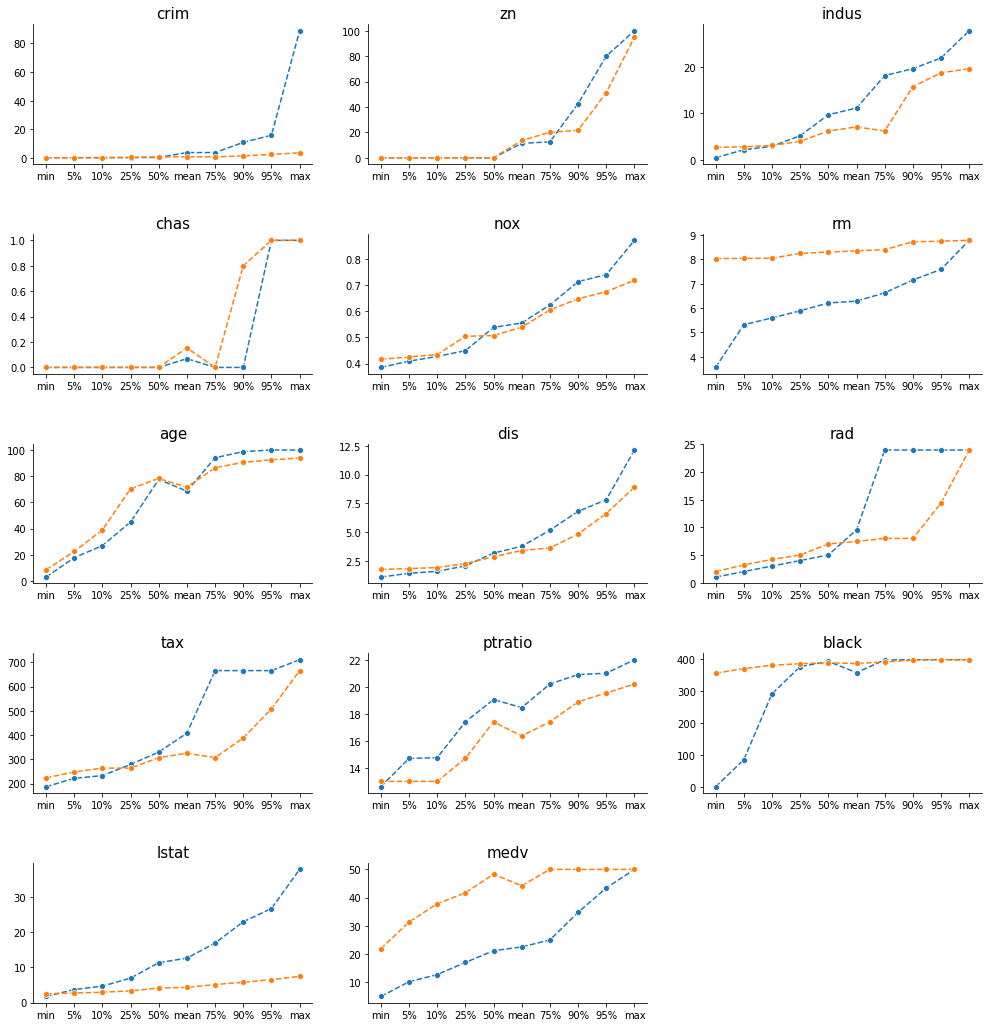

In [121]:
# Comparison of summary statistics
f, axes = plt.subplots(5, 3, figsize=(17, 18))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
r = 0
c = 0
for i in range(len(summ_df.columns)):
    plt.sca(axes[r,c])
    var = summ_df.columns[i]
    sns.lineplot(y=summ_df[var], x=summ_df.index, marker='o', dashes=True, linestyle='--')
    sns.lineplot(y=summ_hrmt[var], x=summ_df.index, marker='o', dashes=True, linestyle='--')
    sns.despine(top=True, right=True)
    plt.title(var, fontsize=15)
    plt.xlabel('')
    plt.ylabel('')
    if c == 2:
        c = 0
        r += 1
        continue
    else:
        c += 1
f.delaxes(axes[4,2])

<a id='obs-hrmt'></a>
<div class="alert alert-block alert-info">
<h5>Observations</h5>
The towns with more than 8 no. of rooms differ from the overall dataset on the following points:<br>
    &ensp; <i><u>Major divergence</u></i><br>
    • <b>crim</b> &rarr; all of the towns have very low crime rates, max crim in hrmt is lower than p75 of df <br>
    • <b>black</b> &rarr; none of the towns have very low black figures <br>
    • <b>lstat</b> &rarr; low lstat levels; max lstat of hrmt is little higher than p25 of df<br>
    • <b>medv</b> &rarr; higher medv levels, p5 of hrmt is higher than p75 of df<br>
    &ensp; <i><u>Minor divergence</u></i><br>
    • <b>indus</b> &rarr; range of indus is smaller, generally lower indus levels<br>
    • <b>rad</b> &rarr; very few cases of high radial highway accessibility<br>
    • <b>tax</b> &rarr; mostly medium tax bracket towns, p90 of hrmt &lt; mean of df<br>
    • <b>ptratio</b> &rarr; generally one notch below df levels<br>
    
*percentile rank is denoted by 'pXX'*
</div>

[go to toc](#toc2)

##### --&nbsp; Workings &nbsp; --------------------------------------------------------------

###### zn

In [122]:
var_prop(df, hrmt, 'zn', sorted(hrmt.zn.unique()))

count_df1  prop_df1  count_df2  prop_df2  ratio
0.0        372.0     0.735        8.0     0.615  0.837
20.0        21.0     0.042        3.0     0.231  5.500
22.0        10.0     0.020        1.0     0.077  3.850
95.0         4.0     0.008        1.0     0.077  9.625
total      407.0     0.805       13.0     1.000  1.242

###### indus

In [123]:
var_prop(df, hrmt, 'indus', sorted(hrmt.indus.unique()))

count_df1  prop_df1  count_df2  prop_df2   ratio
2.68         2.0     0.004        1.0     0.077  19.250
2.89         5.0     0.010        1.0     0.077   7.700
3.97        12.0     0.024        3.0     0.231   9.625
5.86        10.0     0.020        1.0     0.077   3.850
6.2         18.0     0.036        5.0     0.385  10.694
18.1       132.0     0.261        1.0     0.077   0.295
19.58       30.0     0.059        1.0     0.077   1.305
total      209.0     0.414       13.0     1.001   2.418

###### chas

In [124]:
var_prop(df, hrmt, 'chas', [0,1])

count_df1  prop_df1  count_df2  prop_df2  ratio
0          471.0     0.931       11.0     0.846  0.909
1           35.0     0.069        2.0     0.154  2.232
total      506.0     1.000       13.0     1.000  1.000

######  rad

In [125]:
var_prop(df, hrmt, 'rad', sorted(hrmt.rad.unique().astype(int)))

count_df1  prop_df1  count_df2  prop_df2  ratio
2           24.0     0.047        1.0     0.077  1.638
4          110.0     0.217        1.0     0.077  0.355
5          115.0     0.227        4.0     0.308  1.357
7           17.0     0.034        1.0     0.077  2.265
8           24.0     0.047        5.0     0.385  8.191
24         132.0     0.261        1.0     0.077  0.295
total      422.0     0.833       13.0     1.001  1.202

######  tax

In [126]:
var_prop(df, hrmt, 'tax', sorted(hrmt.tax.unique()))

count_df1  prop_df1  count_df2  prop_df2  ratio
224.0       10.0     0.020        1.0     0.077  3.850
264.0       12.0     0.024        3.0     0.231  9.625
276.0        9.0     0.018        1.0     0.077  4.278
307.0       40.0     0.079        5.0     0.385  4.873
330.0       10.0     0.020        1.0     0.077  3.850
403.0       30.0     0.059        1.0     0.077  1.305
666.0      132.0     0.261        1.0     0.077  0.295
total      243.0     0.481       13.0     1.001  2.081

######  black

In [127]:
var_prop(df, hrmt, 'black', sorted(hrmt.black.unique()))

count_df1  prop_df1  count_df2  prop_df2   ratio
354.55        1.0     0.002        1.0     0.077  38.500
378.95        1.0     0.002        1.0     0.077  38.500
382.0         1.0     0.002        1.0     0.077  38.500
384.54        1.0     0.002        1.0     0.077  38.500
385.05        1.0     0.002        1.0     0.077  38.500
385.91        1.0     0.002        1.0     0.077  38.500
386.86        1.0     0.002        1.0     0.077  38.500
387.38        1.0     0.002        1.0     0.077  38.500
388.45        2.0     0.004        1.0     0.077  19.250
389.7         1.0     0.002        1.0     0.077  38.500
390.55        1.0     0.002        1.0     0.077  38.500
396.9       121.0     0.239        2.0     0.154   0.644
total       133.0     0.263       13.0     1.001   3.806

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

<table>
<tr style="background-color:white">
    <th><b>-------------------------------------------- &ensp; &nbsp;</b></th>
    <th><img src="https://www.redwolf.in/image/cache/catalog/artwork-Images/mens/bugs-bunny-thats-all-folks-t-shirt-artwork-700x700.png" style="width:150px" style="display:inline-block; "/></th><th style="float:right"></th>
    <th><b>&ensp;--------------------------------------------</b></th>
</tr>
</table>